In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.stats.multitest import multipletests
from statsmodels.stats.proportion import proportion_confint

import sys
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, '../scripts/')

from equiv_test_funcs import *

import warnings
warnings.filterwarnings("ignore")


/Users/jolivie1/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/jolivie1/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/jolivie1/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"



## Simulation description

2 populations (two different kinds of cell types)

There are only two genes (gene A and gene B)

We're taking `num_samples` samples from each population

Population 1/"cell type":
sample 1
sample 2 
sample 3

Population 2/"cell type":
sample 4
sample 5
sample 6

We're going to define the fraction of gene expression that is from gene A for each population

`geneA_fracs`: it's a list of length 2. The first entry is the fraction of gene A in population 1. The second entry entry is the fraction of gene A in population 2.

For example, if `geneA_fracs = [0.2, 0.8]` it means 20% of the gene expression is from gene A in population 1. So we might expect to have 22 counts from gene A and 83 counts from gene B in a sample from population 1.

For the second population, we might expect something like 79 counts from gene A and 18 from gene B.

The `numReads` list contains all the values of read numbers we want to test for. What I mean by read number: the number of "counts" we have for a given sample.

Additional parameters: when `norm = True` we normalize the scores just by dividing by the total number of reads. When `log_scale = True` we take the log of the count values.

`delta`: this is the equivalence testing parameter. When ` log_scale = True`, `delta = 1` tests for fold change.

In [6]:
outpath = "../plots/"

numReads = [5, 10, 50, 100, 500, 1000, 5000, 10000]

#numReads = [1, 2, 3, 4, 5]

#numReads = [1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 100, 150, 200, 500, 1000, 10000, 100000, 1000000]

num_trials = 10

num_samples = 3


#geneA_fracs = [0.33, 2/3]

geneA_fracs = [0.2, 0.5]

geneA_fracs_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
#geneA_fracs_list = [0.2, 0.4]

norm = True
log_scale = True

delta = 1
alpha = 0.05



num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.0                  0.0                  0.0   
1        10            0.0                  0.0                  0.0   
2        50            0.0                  0.0                  0.0   
3       100            0.0                  0.0                  0.0   
4       500            0.0                  0.0                  0.0   
5      1000            0.0                  0.0                  0.0   
6      5000            0.0                  0.0                  0.0   
7     10000            0.0                  0.0                  0.0   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.0              0.000000              0.000000           1.0   
1             0.0              0.000000              0.000000           1.0   
2             0.3              0.015974              0.584026           0.7   
3             0.7              0.415974              0.984026           0.3   
4             1.0              1.000000              1.000000           0.0   
5             1.0              1.000000              1.000000           0.0   
6             1.0              1.000000              1.000000           0.0   
7             1.0              1.000000              1.000000           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            1.000000            1.000000  
1            1.000000            1.000000  
2            0.415974            0.984026  
3            0.015974            0.584026  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

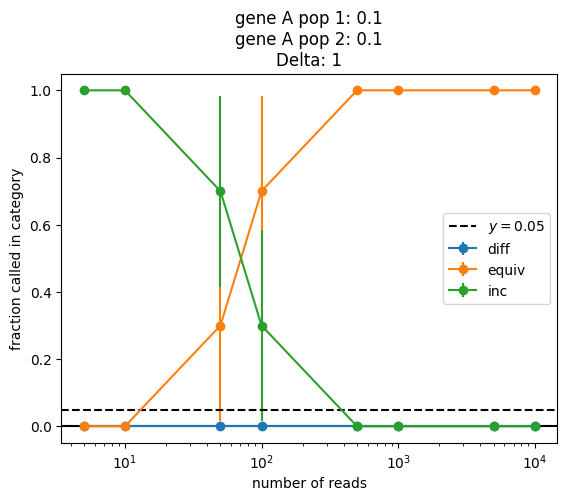

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.1             0.000000             0.285939   
1        10            0.0             0.000000             0.000000   
2        50            0.3             0.015974             0.584026   
3       100            0.1             0.000000             0.285939   
4       500            0.3             0.015974             0.584026   
5      1000            0.3             0.015974             0.584026   
6      5000            0.1             0.000000             0.285939   
7     10000            0.0             0.000000             0.000000   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.0              0.000000              0.000000           0.9   
1             0.1              0.000000              0.285939           0.9   
2             0.2              0.000000              0.447918           0.5   
3             0.0              0.000000              0.000000           0.9   
4             0.3              0.015974              0.584026           0.4   
5             0.2              0.000000              0.447918           0.5   
6             0.6              0.296364              0.903636           0.3   
7             0.8              0.552082              1.000000           0.2   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.714061            1.000000  
1            0.714061            1.000000  
2            0.190102            0.809898  
3            0.714061            1.000000  
4            0.096364            0.703636  
5            0.190102            0.809898  
6            0.015974            0.584026  
7            0.000000            0.447918

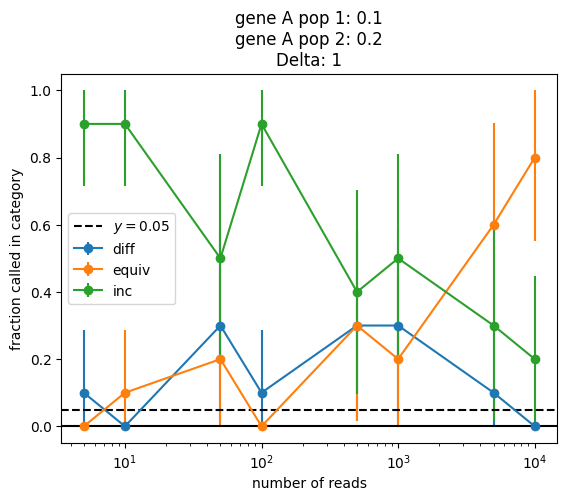

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.1             0.000000             0.285939   
1        10            0.0             0.000000             0.000000   
2        50            0.7             0.415974             0.984026   
3       100            1.0             1.000000             1.000000   
4       500            1.0             1.000000             1.000000   
5      1000            1.0             1.000000             1.000000   
6      5000            1.0             1.000000             1.000000   
7     10000            1.0             1.000000             1.000000   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.0                   0.0                   0.0           0.9   
1             0.0                   0.0                   0.0           1.0   
2             0.0                   0.0                   0.0           0.3   
3             0.0                   0.0                   0.0           0.0   
4             0.0                   0.0                   0.0           0.0   
5             0.0                   0.0                   0.0           0.0   
6             0.0                   0.0                   0.0           0.0   
7             0.0                   0.0                   0.0           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.714061            1.000000  
1            1.000000            1.000000  
2            0.015974            0.584026  
3            0.000000            0.000000  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

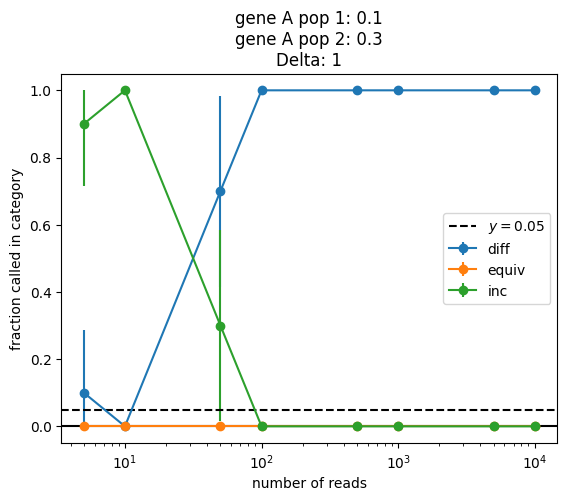

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.2             0.000000             0.447918   
1        10            0.0             0.000000             0.000000   
2        50            0.9             0.714061             1.000000   
3       100            1.0             1.000000             1.000000   
4       500            1.0             1.000000             1.000000   
5      1000            1.0             1.000000             1.000000   
6      5000            1.0             1.000000             1.000000   
7     10000            1.0             1.000000             1.000000   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.0                   0.0                   0.0           0.8   
1             0.0                   0.0                   0.0           1.0   
2             0.0                   0.0                   0.0           0.1   
3             0.0                   0.0                   0.0           0.0   
4             0.0                   0.0                   0.0           0.0   
5             0.0                   0.0                   0.0           0.0   
6             0.0                   0.0                   0.0           0.0   
7             0.0                   0.0                   0.0           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.552082            1.000000  
1            1.000000            1.000000  
2            0.000000            0.285939  
3            0.000000            0.000000  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

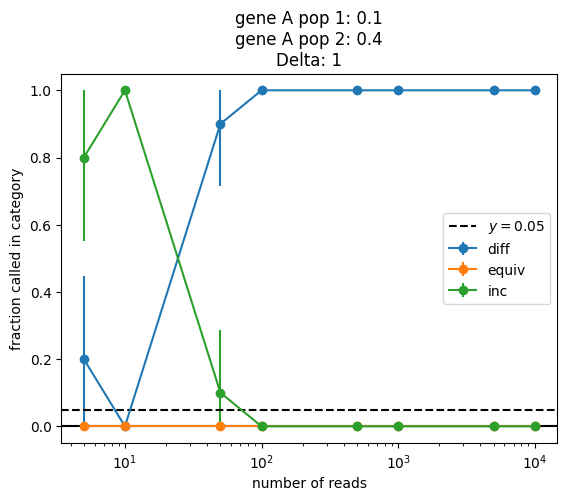

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.2             0.000000             0.447918   
1        10            0.3             0.015974             0.584026   
2        50            0.9             0.714061             1.000000   
3       100            1.0             1.000000             1.000000   
4       500            1.0             1.000000             1.000000   
5      1000            1.0             1.000000             1.000000   
6      5000            1.0             1.000000             1.000000   
7     10000            1.0             1.000000             1.000000   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.0                   0.0                   0.0           0.8   
1             0.0                   0.0                   0.0           0.7   
2             0.0                   0.0                   0.0           0.1   
3             0.0                   0.0                   0.0           0.0   
4             0.0                   0.0                   0.0           0.0   
5             0.0                   0.0                   0.0           0.0   
6             0.0                   0.0                   0.0           0.0   
7             0.0                   0.0                   0.0           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.552082            1.000000  
1            0.415974            0.984026  
2            0.000000            0.285939  
3            0.000000            0.000000  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

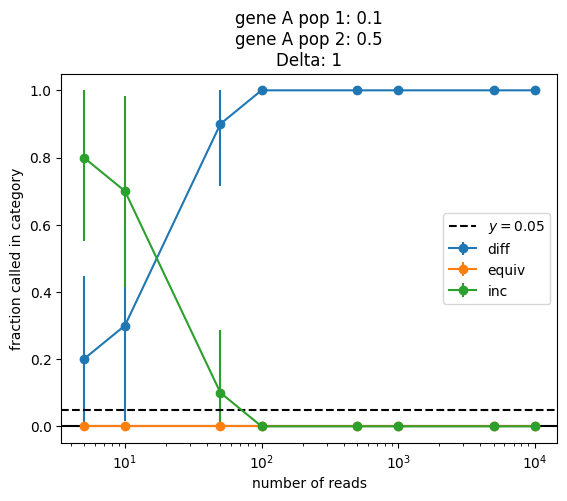

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.3             0.015974             0.584026   
1        10            0.4             0.096364             0.703636   
2        50            1.0             1.000000             1.000000   
3       100            1.0             1.000000             1.000000   
4       500            1.0             1.000000             1.000000   
5      1000            1.0             1.000000             1.000000   
6      5000            1.0             1.000000             1.000000   
7     10000            1.0             1.000000             1.000000   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.0                   0.0                   0.0           0.7   
1             0.0                   0.0                   0.0           0.6   
2             0.0                   0.0                   0.0           0.0   
3             0.0                   0.0                   0.0           0.0   
4             0.0                   0.0                   0.0           0.0   
5             0.0                   0.0                   0.0           0.0   
6             0.0                   0.0                   0.0           0.0   
7             0.0                   0.0                   0.0           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.415974            0.984026  
1            0.296364            0.903636  
2            0.000000            0.000000  
3            0.000000            0.000000  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

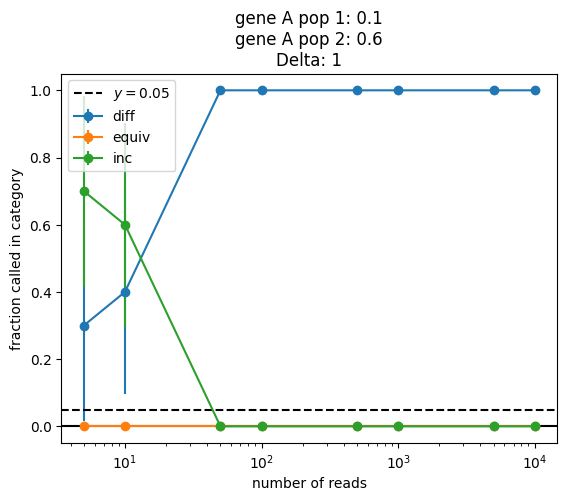

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.5             0.190102             0.809898   
1        10            0.5             0.190102             0.809898   
2        50            1.0             1.000000             1.000000   
3       100            1.0             1.000000             1.000000   
4       500            1.0             1.000000             1.000000   
5      1000            1.0             1.000000             1.000000   
6      5000            1.0             1.000000             1.000000   
7     10000            1.0             1.000000             1.000000   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.0                   0.0                   0.0           0.5   
1             0.0                   0.0                   0.0           0.5   
2             0.0                   0.0                   0.0           0.0   
3             0.0                   0.0                   0.0           0.0   
4             0.0                   0.0                   0.0           0.0   
5             0.0                   0.0                   0.0           0.0   
6             0.0                   0.0                   0.0           0.0   
7             0.0                   0.0                   0.0           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.190102            0.809898  
1            0.190102            0.809898  
2            0.000000            0.000000  
3            0.000000            0.000000  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

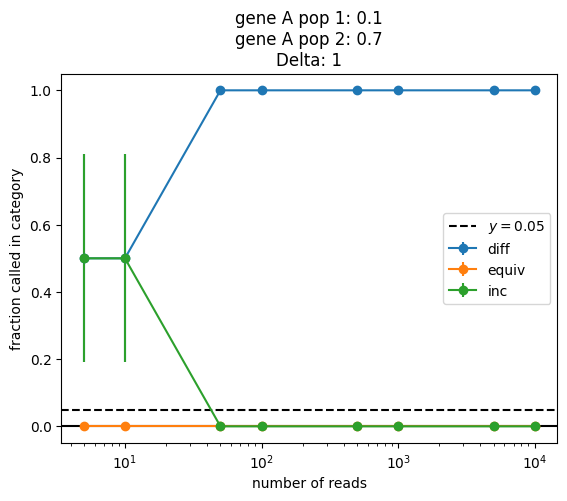

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.7             0.415974             0.984026   
1        10            0.6             0.296364             0.903636   
2        50            1.0             1.000000             1.000000   
3       100            1.0             1.000000             1.000000   
4       500            1.0             1.000000             1.000000   
5      1000            1.0             1.000000             1.000000   
6      5000            1.0             1.000000             1.000000   
7     10000            1.0             1.000000             1.000000   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.0                   0.0                   0.0           0.3   
1             0.0                   0.0                   0.0           0.4   
2             0.0                   0.0                   0.0           0.0   
3             0.0                   0.0                   0.0           0.0   
4             0.0                   0.0                   0.0           0.0   
5             0.0                   0.0                   0.0           0.0   
6             0.0                   0.0                   0.0           0.0   
7             0.0                   0.0                   0.0           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.015974            0.584026  
1            0.096364            0.703636  
2            0.000000            0.000000  
3            0.000000            0.000000  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

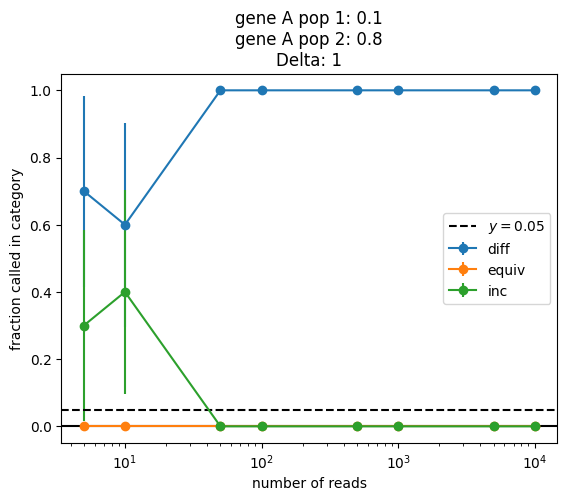

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.7             0.415974             0.984026   
1        10            0.7             0.415974             0.984026   
2        50            1.0             1.000000             1.000000   
3       100            1.0             1.000000             1.000000   
4       500            1.0             1.000000             1.000000   
5      1000            1.0             1.000000             1.000000   
6      5000            1.0             1.000000             1.000000   
7     10000            1.0             1.000000             1.000000   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.0                   0.0                   0.0           0.3   
1             0.0                   0.0                   0.0           0.3   
2             0.0                   0.0                   0.0           0.0   
3             0.0                   0.0                   0.0           0.0   
4             0.0                   0.0                   0.0           0.0   
5             0.0                   0.0                   0.0           0.0   
6             0.0                   0.0                   0.0           0.0   
7             0.0                   0.0                   0.0           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.015974            0.584026  
1            0.015974            0.584026  
2            0.000000            0.000000  
3            0.000000            0.000000  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

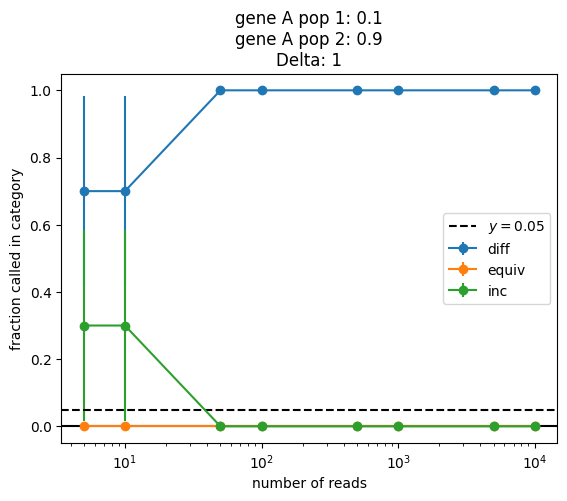

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.2             0.000000             0.447918   
1        10            0.0             0.000000             0.000000   
2        50            0.3             0.015974             0.584026   
3       100            0.5             0.190102             0.809898   
4       500            0.0             0.000000             0.000000   
5      1000            0.5             0.190102             0.809898   
6      5000            0.1             0.000000             0.285939   
7     10000            0.0             0.000000             0.000000   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.0              0.000000              0.000000           0.8   
1             0.0              0.000000              0.000000           1.0   
2             0.1              0.000000              0.285939           0.6   
3             0.1              0.000000              0.285939           0.4   
4             0.2              0.000000              0.447918           0.8   
5             0.1              0.000000              0.285939           0.4   
6             0.5              0.190102              0.809898           0.4   
7             0.9              0.714061              1.000000           0.1   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.552082            1.000000  
1            1.000000            1.000000  
2            0.296364            0.903636  
3            0.096364            0.703636  
4            0.552082            1.000000  
5            0.096364            0.703636  
6            0.096364            0.703636  
7            0.000000            0.285939

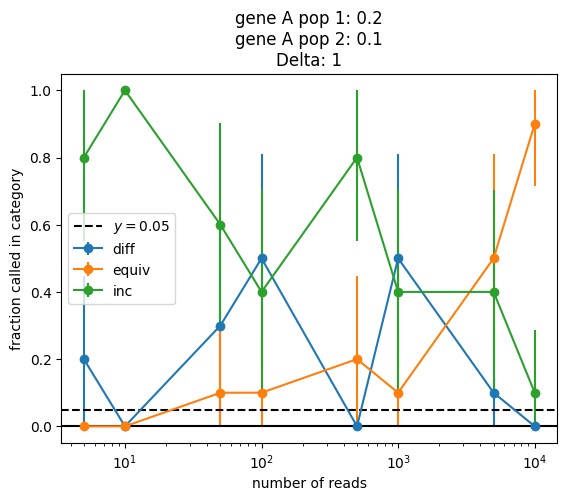

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.0                  0.0                  0.0   
1        10            0.0                  0.0                  0.0   
2        50            0.0                  0.0                  0.0   
3       100            0.0                  0.0                  0.0   
4       500            0.0                  0.0                  0.0   
5      1000            0.0                  0.0                  0.0   
6      5000            0.0                  0.0                  0.0   
7     10000            0.0                  0.0                  0.0   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.1              0.000000              0.285939           0.9   
1             0.1              0.000000              0.285939           0.9   
2             0.8              0.552082              1.000000           0.2   
3             1.0              1.000000              1.000000           0.0   
4             1.0              1.000000              1.000000           0.0   
5             1.0              1.000000              1.000000           0.0   
6             1.0              1.000000              1.000000           0.0   
7             1.0              1.000000              1.000000           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.714061            1.000000  
1            0.714061            1.000000  
2            0.000000            0.447918  
3            0.000000            0.000000  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

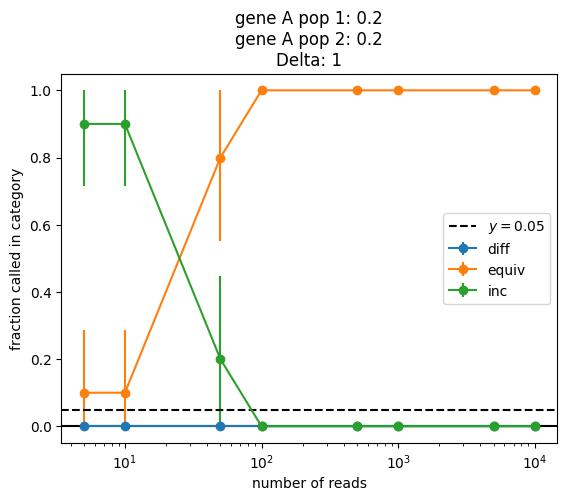

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.0                  0.0                  0.0   
1        10            0.0                  0.0                  0.0   
2        50            0.0                  0.0                  0.0   
3       100            0.0                  0.0                  0.0   
4       500            0.0                  0.0                  0.0   
5      1000            0.0                  0.0                  0.0   
6      5000            0.0                  0.0                  0.0   
7     10000            0.0                  0.0                  0.0   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.1              0.000000              0.285939           0.9   
1             0.2              0.000000              0.447918           0.8   
2             0.3              0.015974              0.584026           0.7   
3             0.5              0.190102              0.809898           0.5   
4             1.0              1.000000              1.000000           0.0   
5             1.0              1.000000              1.000000           0.0   
6             1.0              1.000000              1.000000           0.0   
7             1.0              1.000000              1.000000           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.714061            1.000000  
1            0.552082            1.000000  
2            0.415974            0.984026  
3            0.190102            0.809898  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

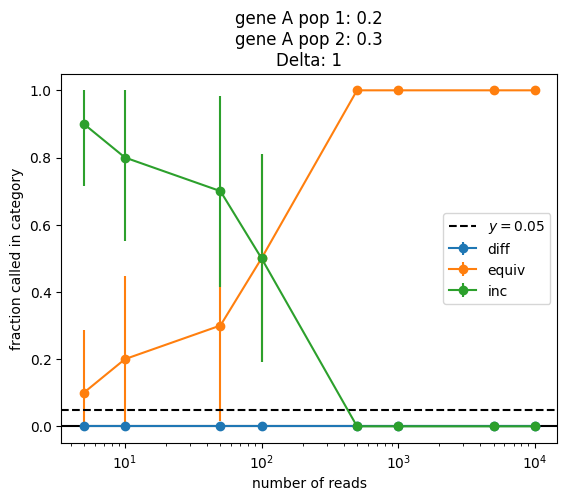

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.0             0.000000             0.000000   
1        10            0.0             0.000000             0.000000   
2        50            0.5             0.190102             0.809898   
3       100            0.5             0.190102             0.809898   
4       500            0.4             0.096364             0.703636   
5      1000            0.3             0.015974             0.584026   
6      5000            0.0             0.000000             0.000000   
7     10000            0.0             0.000000             0.000000   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.0              0.000000              0.000000           1.0   
1             0.1              0.000000              0.285939           0.9   
2             0.2              0.000000              0.447918           0.3   
3             0.1              0.000000              0.285939           0.4   
4             0.3              0.015974              0.584026           0.3   
5             0.4              0.096364              0.703636           0.3   
6             0.6              0.296364              0.903636           0.4   
7             0.9              0.714061              1.000000           0.1   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            1.000000            1.000000  
1            0.714061            1.000000  
2            0.015974            0.584026  
3            0.096364            0.703636  
4            0.015974            0.584026  
5            0.015974            0.584026  
6            0.096364            0.703636  
7            0.000000            0.285939

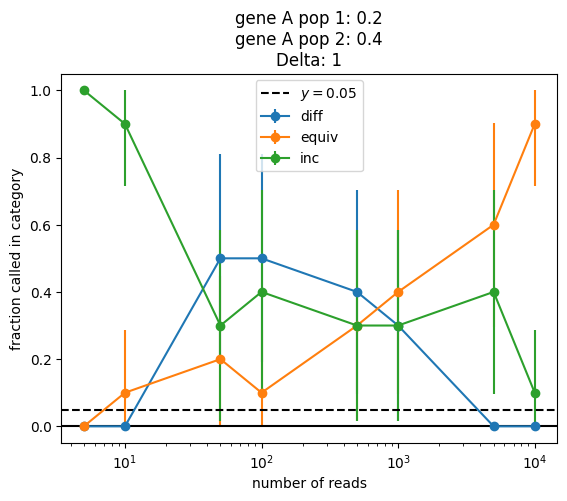

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.1             0.000000             0.285939   
1        10            0.3             0.015974             0.584026   
2        50            0.8             0.552082             1.000000   
3       100            1.0             1.000000             1.000000   
4       500            1.0             1.000000             1.000000   
5      1000            1.0             1.000000             1.000000   
6      5000            1.0             1.000000             1.000000   
7     10000            1.0             1.000000             1.000000   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.0                   0.0                   0.0           0.9   
1             0.0                   0.0                   0.0           0.7   
2             0.0                   0.0                   0.0           0.2   
3             0.0                   0.0                   0.0           0.0   
4             0.0                   0.0                   0.0           0.0   
5             0.0                   0.0                   0.0           0.0   
6             0.0                   0.0                   0.0           0.0   
7             0.0                   0.0                   0.0           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.714061            1.000000  
1            0.415974            0.984026  
2            0.000000            0.447918  
3            0.000000            0.000000  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

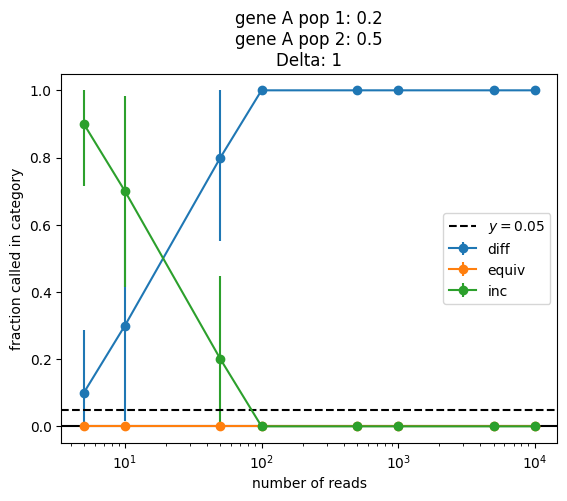

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.2             0.000000             0.447918   
1        10            0.3             0.015974             0.584026   
2        50            0.9             0.714061             1.000000   
3       100            1.0             1.000000             1.000000   
4       500            1.0             1.000000             1.000000   
5      1000            1.0             1.000000             1.000000   
6      5000            1.0             1.000000             1.000000   
7     10000            1.0             1.000000             1.000000   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.1                   0.0              0.285939           0.7   
1             0.0                   0.0              0.000000           0.7   
2             0.0                   0.0              0.000000           0.1   
3             0.0                   0.0              0.000000           0.0   
4             0.0                   0.0              0.000000           0.0   
5             0.0                   0.0              0.000000           0.0   
6             0.0                   0.0              0.000000           0.0   
7             0.0                   0.0              0.000000           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.415974            0.984026  
1            0.415974            0.984026  
2            0.000000            0.285939  
3            0.000000            0.000000  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

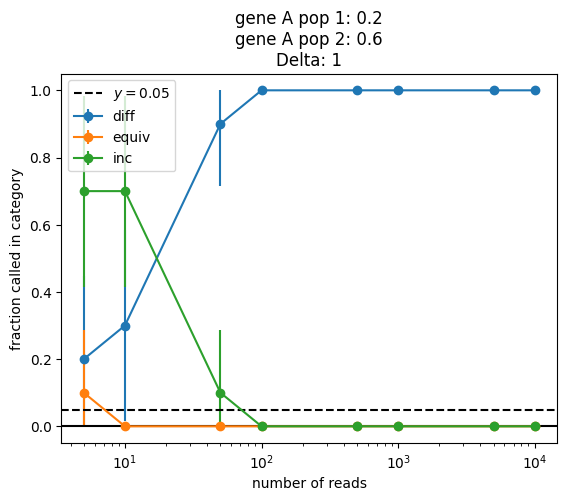

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.4             0.096364             0.703636   
1        10            0.4             0.096364             0.703636   
2        50            1.0             1.000000             1.000000   
3       100            1.0             1.000000             1.000000   
4       500            1.0             1.000000             1.000000   
5      1000            1.0             1.000000             1.000000   
6      5000            1.0             1.000000             1.000000   
7     10000            1.0             1.000000             1.000000   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.0                   0.0                   0.0           0.6   
1             0.0                   0.0                   0.0           0.6   
2             0.0                   0.0                   0.0           0.0   
3             0.0                   0.0                   0.0           0.0   
4             0.0                   0.0                   0.0           0.0   
5             0.0                   0.0                   0.0           0.0   
6             0.0                   0.0                   0.0           0.0   
7             0.0                   0.0                   0.0           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.296364            0.903636  
1            0.296364            0.903636  
2            0.000000            0.000000  
3            0.000000            0.000000  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

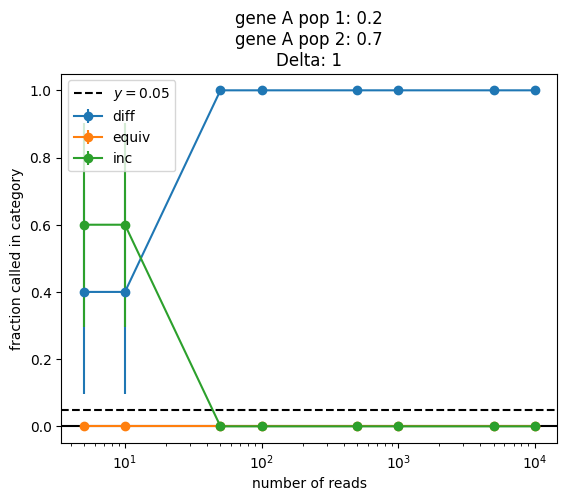

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.4             0.096364             0.703636   
1        10            0.6             0.296364             0.903636   
2        50            1.0             1.000000             1.000000   
3       100            1.0             1.000000             1.000000   
4       500            1.0             1.000000             1.000000   
5      1000            1.0             1.000000             1.000000   
6      5000            1.0             1.000000             1.000000   
7     10000            1.0             1.000000             1.000000   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.0                   0.0                   0.0           0.6   
1             0.0                   0.0                   0.0           0.4   
2             0.0                   0.0                   0.0           0.0   
3             0.0                   0.0                   0.0           0.0   
4             0.0                   0.0                   0.0           0.0   
5             0.0                   0.0                   0.0           0.0   
6             0.0                   0.0                   0.0           0.0   
7             0.0                   0.0                   0.0           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.296364            0.903636  
1            0.096364            0.703636  
2            0.000000            0.000000  
3            0.000000            0.000000  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

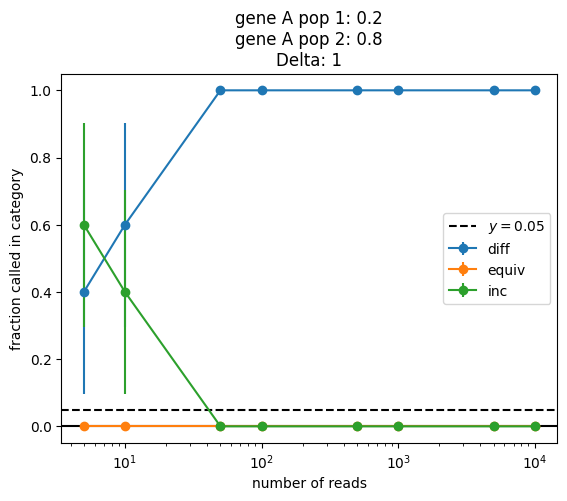

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.4             0.096364             0.703636   
1        10            0.6             0.296364             0.903636   
2        50            1.0             1.000000             1.000000   
3       100            1.0             1.000000             1.000000   
4       500            1.0             1.000000             1.000000   
5      1000            1.0             1.000000             1.000000   
6      5000            1.0             1.000000             1.000000   
7     10000            1.0             1.000000             1.000000   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.0                   0.0                   0.0           0.6   
1             0.0                   0.0                   0.0           0.4   
2             0.0                   0.0                   0.0           0.0   
3             0.0                   0.0                   0.0           0.0   
4             0.0                   0.0                   0.0           0.0   
5             0.0                   0.0                   0.0           0.0   
6             0.0                   0.0                   0.0           0.0   
7             0.0                   0.0                   0.0           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.296364            0.903636  
1            0.096364            0.703636  
2            0.000000            0.000000  
3            0.000000            0.000000  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

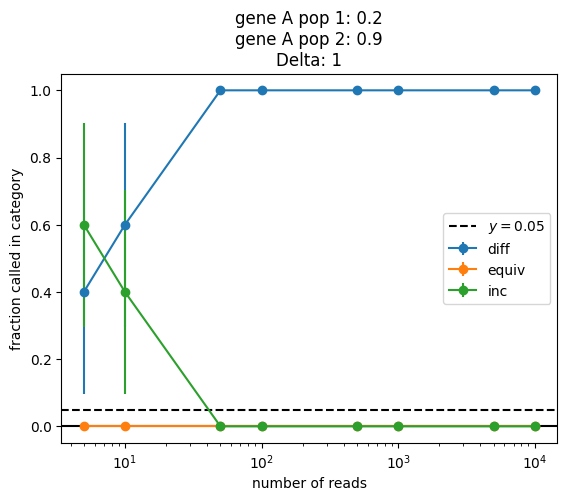

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.3             0.015974             0.584026   
1        10            0.2             0.000000             0.447918   
2        50            0.8             0.552082             1.000000   
3       100            1.0             1.000000             1.000000   
4       500            1.0             1.000000             1.000000   
5      1000            1.0             1.000000             1.000000   
6      5000            1.0             1.000000             1.000000   
7     10000            1.0             1.000000             1.000000   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.0                   0.0                   0.0           0.7   
1             0.0                   0.0                   0.0           0.8   
2             0.0                   0.0                   0.0           0.2   
3             0.0                   0.0                   0.0           0.0   
4             0.0                   0.0                   0.0           0.0   
5             0.0                   0.0                   0.0           0.0   
6             0.0                   0.0                   0.0           0.0   
7             0.0                   0.0                   0.0           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.415974            0.984026  
1            0.552082            1.000000  
2            0.000000            0.447918  
3            0.000000            0.000000  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

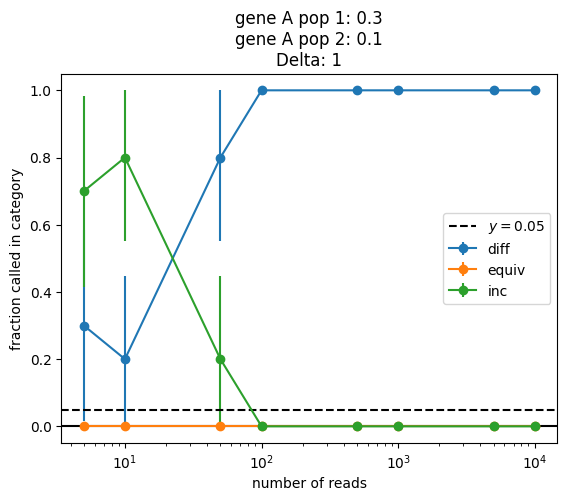

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.0                  0.0             0.000000   
1        10            0.0                  0.0             0.000000   
2        50            0.1                  0.0             0.285939   
3       100            0.0                  0.0             0.000000   
4       500            0.0                  0.0             0.000000   
5      1000            0.0                  0.0             0.000000   
6      5000            0.0                  0.0             0.000000   
7     10000            0.0                  0.0             0.000000   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.1              0.000000              0.285939           0.9   
1             0.0              0.000000              0.000000           1.0   
2             0.5              0.190102              0.809898           0.4   
3             0.6              0.296364              0.903636           0.4   
4             1.0              1.000000              1.000000           0.0   
5             1.0              1.000000              1.000000           0.0   
6             1.0              1.000000              1.000000           0.0   
7             1.0              1.000000              1.000000           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.714061            1.000000  
1            1.000000            1.000000  
2            0.096364            0.703636  
3            0.096364            0.703636  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

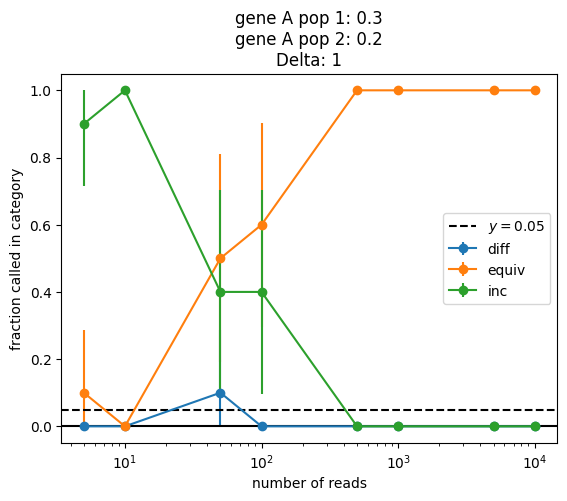

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.0                  0.0                  0.0   
1        10            0.0                  0.0                  0.0   
2        50            0.0                  0.0                  0.0   
3       100            0.0                  0.0                  0.0   
4       500            0.0                  0.0                  0.0   
5      1000            0.0                  0.0                  0.0   
6      5000            0.0                  0.0                  0.0   
7     10000            0.0                  0.0                  0.0   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.4              0.096364              0.703636           0.6   
1             0.1              0.000000              0.285939           0.9   
2             1.0              1.000000              1.000000           0.0   
3             1.0              1.000000              1.000000           0.0   
4             1.0              1.000000              1.000000           0.0   
5             1.0              1.000000              1.000000           0.0   
6             1.0              1.000000              1.000000           0.0   
7             1.0              1.000000              1.000000           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.296364            0.903636  
1            0.714061            1.000000  
2            0.000000            0.000000  
3            0.000000            0.000000  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

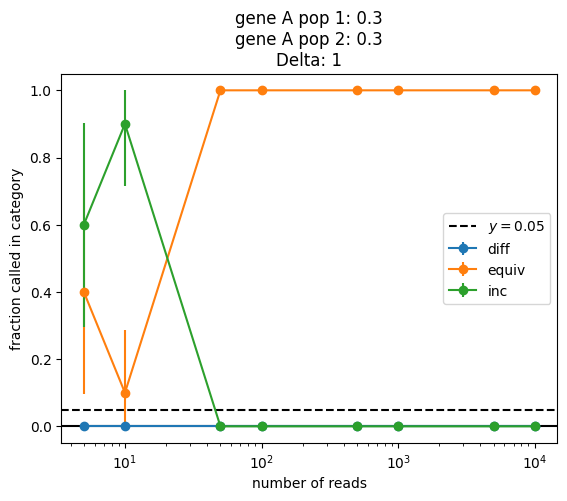

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.0                  0.0                  0.0   
1        10            0.0                  0.0                  0.0   
2        50            0.0                  0.0                  0.0   
3       100            0.0                  0.0                  0.0   
4       500            0.0                  0.0                  0.0   
5      1000            0.0                  0.0                  0.0   
6      5000            0.0                  0.0                  0.0   
7     10000            0.0                  0.0                  0.0   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.2              0.000000              0.447918           0.8   
1             0.2              0.000000              0.447918           0.8   
2             0.8              0.552082              1.000000           0.2   
3             1.0              1.000000              1.000000           0.0   
4             1.0              1.000000              1.000000           0.0   
5             1.0              1.000000              1.000000           0.0   
6             1.0              1.000000              1.000000           0.0   
7             1.0              1.000000              1.000000           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.552082            1.000000  
1            0.552082            1.000000  
2            0.000000            0.447918  
3            0.000000            0.000000  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

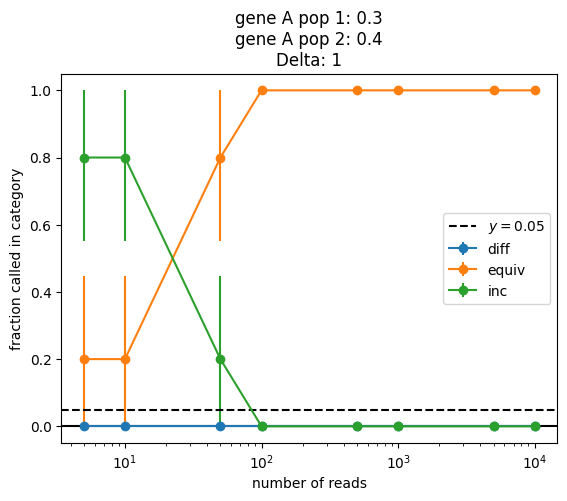

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.0                  0.0             0.000000   
1        10            0.0                  0.0             0.000000   
2        50            0.2                  0.0             0.447918   
3       100            0.1                  0.0             0.285939   
4       500            0.0                  0.0             0.000000   
5      1000            0.0                  0.0             0.000000   
6      5000            0.0                  0.0             0.000000   
7     10000            0.0                  0.0             0.000000   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.0              0.000000              0.000000           1.0   
1             0.1              0.000000              0.285939           0.9   
2             0.4              0.096364              0.703636           0.4   
3             0.3              0.015974              0.584026           0.6   
4             1.0              1.000000              1.000000           0.0   
5             1.0              1.000000              1.000000           0.0   
6             1.0              1.000000              1.000000           0.0   
7             1.0              1.000000              1.000000           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            1.000000            1.000000  
1            0.714061            1.000000  
2            0.096364            0.703636  
3            0.296364            0.903636  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

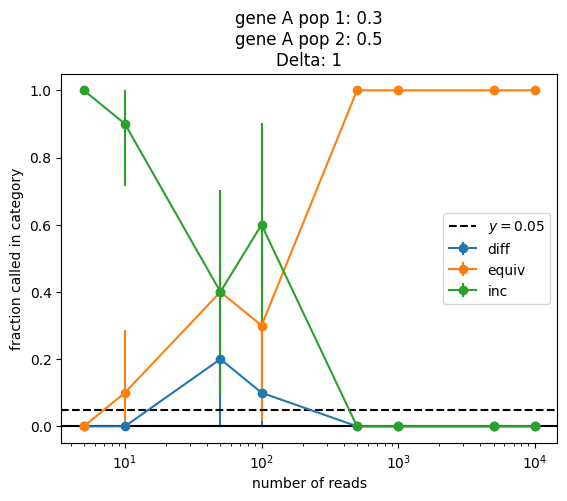

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.2             0.000000             0.447918   
1        10            0.1             0.000000             0.285939   
2        50            0.4             0.096364             0.703636   
3       100            0.6             0.296364             0.903636   
4       500            0.5             0.190102             0.809898   
5      1000            0.2             0.000000             0.447918   
6      5000            0.1             0.000000             0.285939   
7     10000            0.0             0.000000             0.000000   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.1              0.000000              0.285939           0.7   
1             0.0              0.000000              0.000000           0.9   
2             0.1              0.000000              0.285939           0.5   
3             0.1              0.000000              0.285939           0.3   
4             0.2              0.000000              0.447918           0.3   
5             0.1              0.000000              0.285939           0.7   
6             0.6              0.296364              0.903636           0.3   
7             0.6              0.296364              0.903636           0.4   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.415974            0.984026  
1            0.714061            1.000000  
2            0.190102            0.809898  
3            0.015974            0.584026  
4            0.015974            0.584026  
5            0.415974            0.984026  
6            0.015974            0.584026  
7            0.096364            0.703636

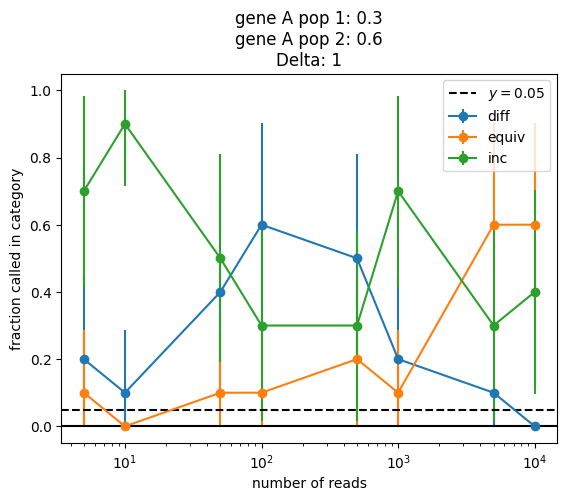

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.3             0.015974             0.584026   
1        10            0.2             0.000000             0.447918   
2        50            0.8             0.552082             1.000000   
3       100            1.0             1.000000             1.000000   
4       500            1.0             1.000000             1.000000   
5      1000            1.0             1.000000             1.000000   
6      5000            1.0             1.000000             1.000000   
7     10000            1.0             1.000000             1.000000   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.0                   0.0                   0.0           0.7   
1             0.0                   0.0                   0.0           0.8   
2             0.0                   0.0                   0.0           0.2   
3             0.0                   0.0                   0.0           0.0   
4             0.0                   0.0                   0.0           0.0   
5             0.0                   0.0                   0.0           0.0   
6             0.0                   0.0                   0.0           0.0   
7             0.0                   0.0                   0.0           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.415974            0.984026  
1            0.552082            1.000000  
2            0.000000            0.447918  
3            0.000000            0.000000  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

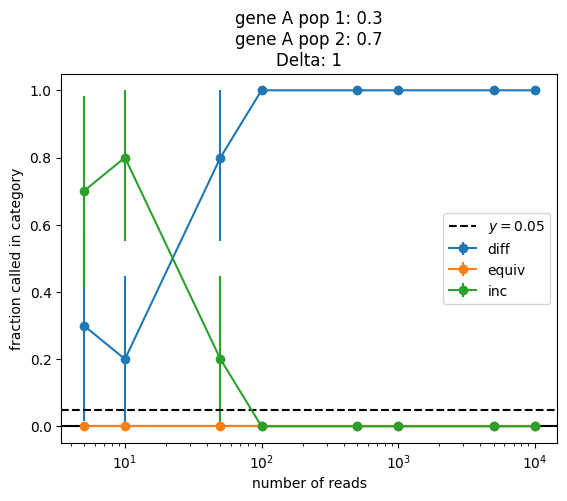

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.4             0.096364             0.703636   
1        10            0.4             0.096364             0.703636   
2        50            1.0             1.000000             1.000000   
3       100            1.0             1.000000             1.000000   
4       500            1.0             1.000000             1.000000   
5      1000            1.0             1.000000             1.000000   
6      5000            1.0             1.000000             1.000000   
7     10000            1.0             1.000000             1.000000   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.0                   0.0                   0.0           0.6   
1             0.0                   0.0                   0.0           0.6   
2             0.0                   0.0                   0.0           0.0   
3             0.0                   0.0                   0.0           0.0   
4             0.0                   0.0                   0.0           0.0   
5             0.0                   0.0                   0.0           0.0   
6             0.0                   0.0                   0.0           0.0   
7             0.0                   0.0                   0.0           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.296364            0.903636  
1            0.296364            0.903636  
2            0.000000            0.000000  
3            0.000000            0.000000  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

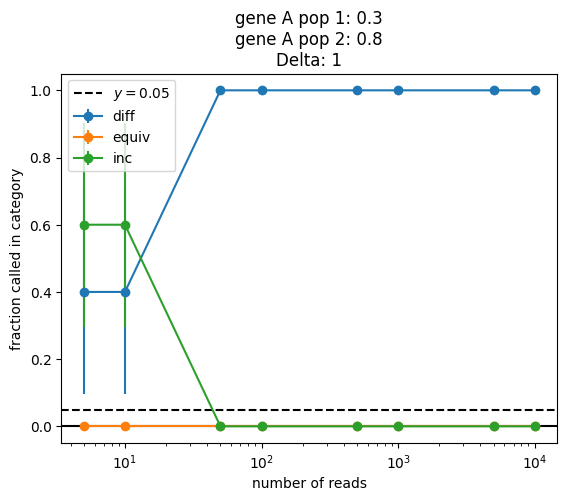

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.4             0.096364             0.703636   
1        10            0.5             0.190102             0.809898   
2        50            1.0             1.000000             1.000000   
3       100            1.0             1.000000             1.000000   
4       500            1.0             1.000000             1.000000   
5      1000            1.0             1.000000             1.000000   
6      5000            1.0             1.000000             1.000000   
7     10000            1.0             1.000000             1.000000   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.0                   0.0                   0.0           0.6   
1             0.0                   0.0                   0.0           0.5   
2             0.0                   0.0                   0.0           0.0   
3             0.0                   0.0                   0.0           0.0   
4             0.0                   0.0                   0.0           0.0   
5             0.0                   0.0                   0.0           0.0   
6             0.0                   0.0                   0.0           0.0   
7             0.0                   0.0                   0.0           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.296364            0.903636  
1            0.190102            0.809898  
2            0.000000            0.000000  
3            0.000000            0.000000  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.3             0.015974             0.584026   
1        10            0.2             0.000000             0.447918   
2        50            1.0             1.000000             1.000000   
3       100            1.0             1.000000             1.000000   
4       500            1.0             1.000000             1.000000   
5      1000            1.0             1.000000             1.000000   
6      5000            1.0             1.000000             1.000000   
7     10000            1.0             1.000000             1.000000   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.0                   0.0                   0.0           0.7   
1             0.0                   0.0                   0.0           0.8   
2             0.0                   0.0                   0.0           0.0   
3             0.0                   0.0                   0.0           0.0   
4             0.0                   0.0                   0.0           0.0   
5             0.0                   0.0                   0.0           0.0   
6             0.0                   0.0                   0.0           0.0   
7             0.0                   0.0                   0.0           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.415974            0.984026  
1            0.552082            1.000000  
2            0.000000            0.000000  
3            0.000000            0.000000  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

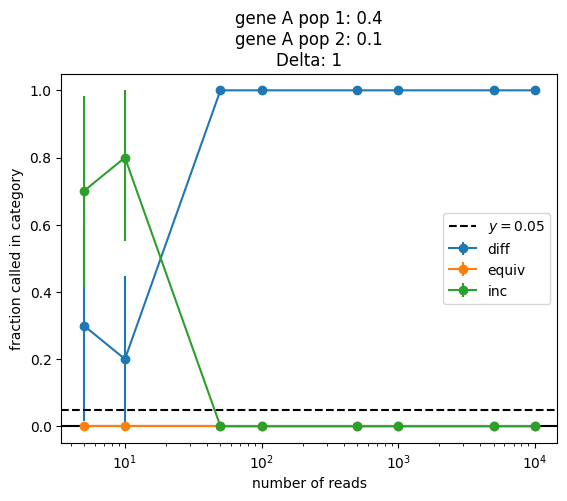

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.2             0.000000             0.447918   
1        10            0.1             0.000000             0.285939   
2        50            0.3             0.015974             0.584026   
3       100            0.7             0.415974             0.984026   
4       500            0.3             0.015974             0.584026   
5      1000            0.2             0.000000             0.447918   
6      5000            0.2             0.000000             0.447918   
7     10000            0.0             0.000000             0.000000   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.2              0.000000              0.447918           0.6   
1             0.0              0.000000              0.000000           0.9   
2             0.1              0.000000              0.285939           0.6   
3             0.1              0.000000              0.285939           0.2   
4             0.0              0.000000              0.000000           0.7   
5             0.2              0.000000              0.447918           0.6   
6             0.6              0.296364              0.903636           0.2   
7             1.0              1.000000              1.000000           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.296364            0.903636  
1            0.714061            1.000000  
2            0.296364            0.903636  
3            0.000000            0.447918  
4            0.415974            0.984026  
5            0.296364            0.903636  
6            0.000000            0.447918  
7            0.000000            0.000000

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.0                  0.0                  0.0   
1        10            0.0                  0.0                  0.0   
2        50            0.0                  0.0                  0.0   
3       100            0.0                  0.0                  0.0   
4       500            0.0                  0.0                  0.0   
5      1000            0.0                  0.0                  0.0   
6      5000            0.0                  0.0                  0.0   
7     10000            0.0                  0.0                  0.0   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.2              0.000000              0.447918           0.8   
1             0.4              0.096364              0.703636           0.6   
2             0.8              0.552082              1.000000           0.2   
3             0.9              0.714061              1.000000           0.1   
4             1.0              1.000000              1.000000           0.0   
5             1.0              1.000000              1.000000           0.0   
6             1.0              1.000000              1.000000           0.0   
7             1.0              1.000000              1.000000           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.552082            1.000000  
1            0.296364            0.903636  
2            0.000000            0.447918  
3            0.000000            0.285939  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

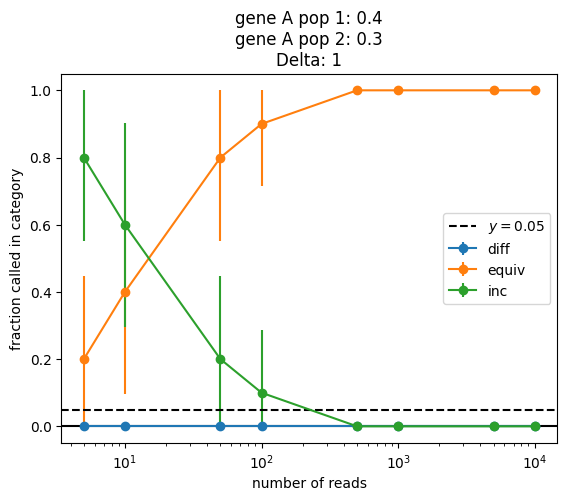

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.0                  0.0                  0.0   
1        10            0.0                  0.0                  0.0   
2        50            0.0                  0.0                  0.0   
3       100            0.0                  0.0                  0.0   
4       500            0.0                  0.0                  0.0   
5      1000            0.0                  0.0                  0.0   
6      5000            0.0                  0.0                  0.0   
7     10000            0.0                  0.0                  0.0   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.3              0.015974              0.584026           0.7   
1             0.4              0.096364              0.703636           0.6   
2             1.0              1.000000              1.000000           0.0   
3             1.0              1.000000              1.000000           0.0   
4             1.0              1.000000              1.000000           0.0   
5             1.0              1.000000              1.000000           0.0   
6             1.0              1.000000              1.000000           0.0   
7             1.0              1.000000              1.000000           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.415974            0.984026  
1            0.296364            0.903636  
2            0.000000            0.000000  
3            0.000000            0.000000  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

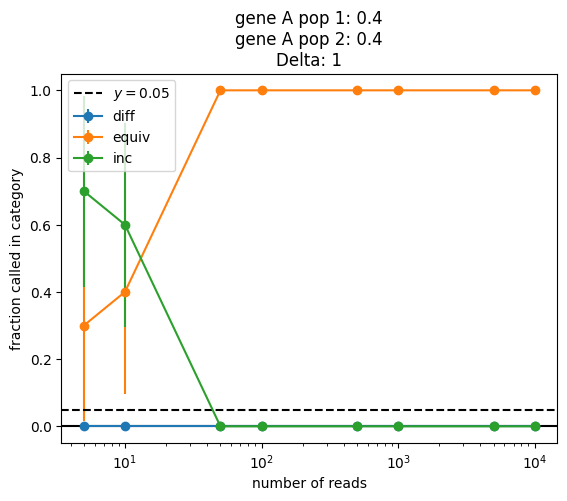

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.0                  0.0                  0.0   
1        10            0.0                  0.0                  0.0   
2        50            0.0                  0.0                  0.0   
3       100            0.0                  0.0                  0.0   
4       500            0.0                  0.0                  0.0   
5      1000            0.0                  0.0                  0.0   
6      5000            0.0                  0.0                  0.0   
7     10000            0.0                  0.0                  0.0   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.3              0.015974              0.584026           0.7   
1             0.3              0.015974              0.584026           0.7   
2             0.9              0.714061              1.000000           0.1   
3             1.0              1.000000              1.000000           0.0   
4             1.0              1.000000              1.000000           0.0   
5             1.0              1.000000              1.000000           0.0   
6             1.0              1.000000              1.000000           0.0   
7             1.0              1.000000              1.000000           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.415974            0.984026  
1            0.415974            0.984026  
2            0.000000            0.285939  
3            0.000000            0.000000  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

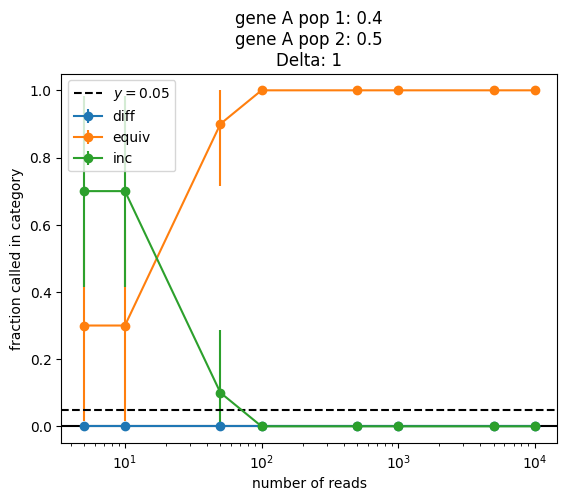

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.0                  0.0                  0.0   
1        10            0.0                  0.0                  0.0   
2        50            0.0                  0.0                  0.0   
3       100            0.0                  0.0                  0.0   
4       500            0.0                  0.0                  0.0   
5      1000            0.0                  0.0                  0.0   
6      5000            0.0                  0.0                  0.0   
7     10000            0.0                  0.0                  0.0   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.3              0.015974              0.584026           0.7   
1             0.4              0.096364              0.703636           0.6   
2             0.8              0.552082              1.000000           0.2   
3             1.0              1.000000              1.000000           0.0   
4             1.0              1.000000              1.000000           0.0   
5             1.0              1.000000              1.000000           0.0   
6             1.0              1.000000              1.000000           0.0   
7             1.0              1.000000              1.000000           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.415974            0.984026  
1            0.296364            0.903636  
2            0.000000            0.447918  
3            0.000000            0.000000  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

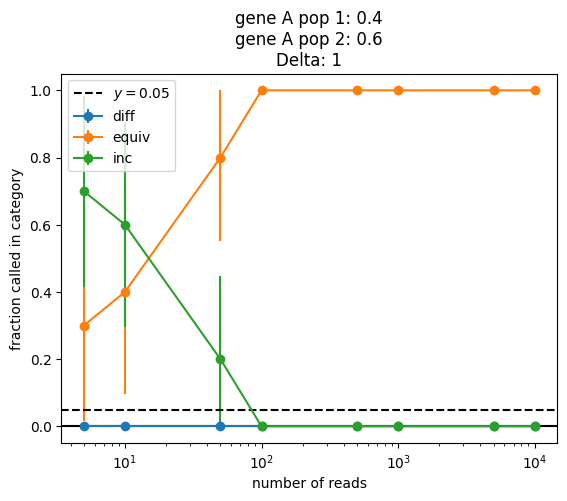

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.1                  0.0             0.285939   
1        10            0.0                  0.0             0.000000   
2        50            0.0                  0.0             0.000000   
3       100            0.1                  0.0             0.285939   
4       500            0.0                  0.0             0.000000   
5      1000            0.0                  0.0             0.000000   
6      5000            0.0                  0.0             0.000000   
7     10000            0.0                  0.0             0.000000   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.1              0.000000              0.285939           0.8   
1             0.2              0.000000              0.447918           0.8   
2             0.4              0.096364              0.703636           0.6   
3             0.3              0.015974              0.584026           0.6   
4             1.0              1.000000              1.000000           0.0   
5             1.0              1.000000              1.000000           0.0   
6             1.0              1.000000              1.000000           0.0   
7             1.0              1.000000              1.000000           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.552082            1.000000  
1            0.552082            1.000000  
2            0.296364            0.903636  
3            0.296364            0.903636  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

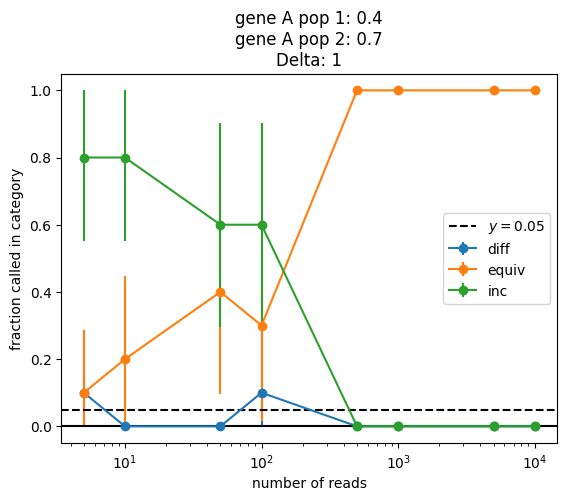

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.3             0.015974             0.584026   
1        10            0.2             0.000000             0.447918   
2        50            0.4             0.096364             0.703636   
3       100            0.4             0.096364             0.703636   
4       500            0.3             0.015974             0.584026   
5      1000            0.6             0.296364             0.903636   
6      5000            0.1             0.000000             0.285939   
7     10000            0.0             0.000000             0.000000   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.1              0.000000              0.285939           0.6   
1             0.1              0.000000              0.285939           0.7   
2             0.1              0.000000              0.285939           0.5   
3             0.0              0.000000              0.000000           0.6   
4             0.1              0.000000              0.285939           0.6   
5             0.2              0.000000              0.447918           0.2   
6             0.3              0.015974              0.584026           0.6   
7             0.8              0.552082              1.000000           0.2   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.296364            0.903636  
1            0.415974            0.984026  
2            0.190102            0.809898  
3            0.296364            0.903636  
4            0.296364            0.903636  
5            0.000000            0.447918  
6            0.296364            0.903636  
7            0.000000            0.447918

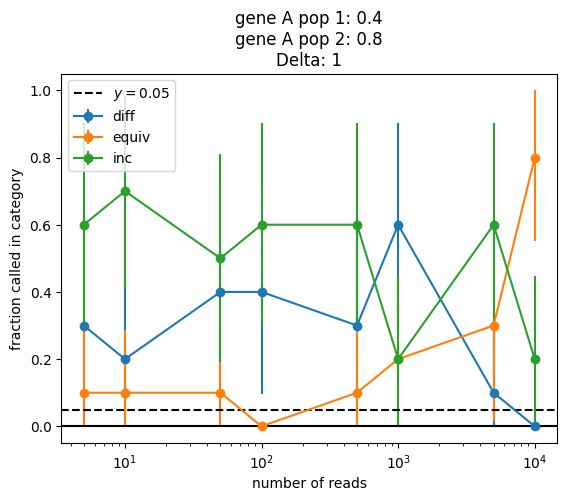

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.6             0.296364             0.903636   
1        10            0.2             0.000000             0.447918   
2        50            0.9             0.714061             1.000000   
3       100            0.9             0.714061             1.000000   
4       500            1.0             1.000000             1.000000   
5      1000            1.0             1.000000             1.000000   
6      5000            1.0             1.000000             1.000000   
7     10000            1.0             1.000000             1.000000   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.1                   0.0              0.285939           0.3   
1             0.0                   0.0              0.000000           0.8   
2             0.0                   0.0              0.000000           0.1   
3             0.0                   0.0              0.000000           0.1   
4             0.0                   0.0              0.000000           0.0   
5             0.0                   0.0              0.000000           0.0   
6             0.0                   0.0              0.000000           0.0   
7             0.0                   0.0              0.000000           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.015974            0.584026  
1            0.552082            1.000000  
2            0.000000            0.285939  
3            0.000000            0.285939  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

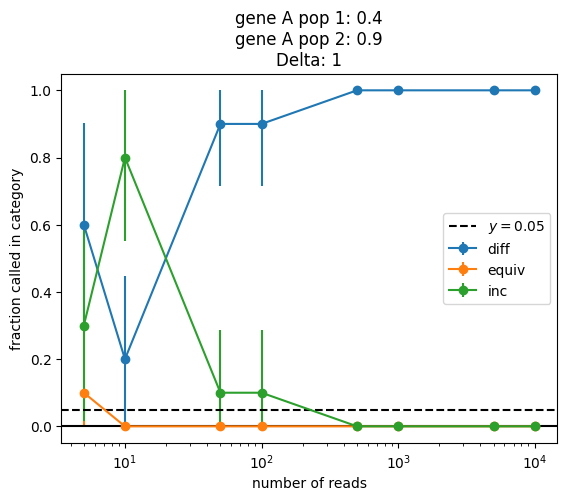

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.3             0.015974             0.584026   
1        10            0.3             0.015974             0.584026   
2        50            1.0             1.000000             1.000000   
3       100            1.0             1.000000             1.000000   
4       500            1.0             1.000000             1.000000   
5      1000            1.0             1.000000             1.000000   
6      5000            1.0             1.000000             1.000000   
7     10000            1.0             1.000000             1.000000   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.0                   0.0                   0.0           0.7   
1             0.0                   0.0                   0.0           0.7   
2             0.0                   0.0                   0.0           0.0   
3             0.0                   0.0                   0.0           0.0   
4             0.0                   0.0                   0.0           0.0   
5             0.0                   0.0                   0.0           0.0   
6             0.0                   0.0                   0.0           0.0   
7             0.0                   0.0                   0.0           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.415974            0.984026  
1            0.415974            0.984026  
2            0.000000            0.000000  
3            0.000000            0.000000  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

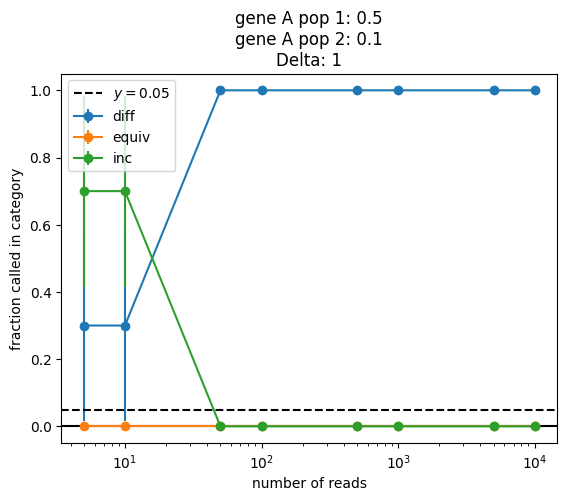

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.3             0.015974             0.584026   
1        10            0.2             0.000000             0.447918   
2        50            0.8             0.552082             1.000000   
3       100            1.0             1.000000             1.000000   
4       500            1.0             1.000000             1.000000   
5      1000            1.0             1.000000             1.000000   
6      5000            1.0             1.000000             1.000000   
7     10000            1.0             1.000000             1.000000   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.0                   0.0                   0.0           0.7   
1             0.0                   0.0                   0.0           0.8   
2             0.0                   0.0                   0.0           0.2   
3             0.0                   0.0                   0.0           0.0   
4             0.0                   0.0                   0.0           0.0   
5             0.0                   0.0                   0.0           0.0   
6             0.0                   0.0                   0.0           0.0   
7             0.0                   0.0                   0.0           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.415974            0.984026  
1            0.552082            1.000000  
2            0.000000            0.447918  
3            0.000000            0.000000  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

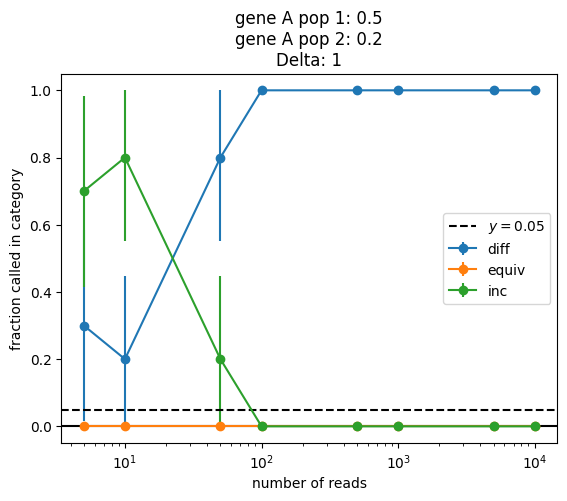

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.1                  0.0             0.285939   
1        10            0.1                  0.0             0.285939   
2        50            0.1                  0.0             0.285939   
3       100            0.1                  0.0             0.285939   
4       500            0.0                  0.0             0.000000   
5      1000            0.0                  0.0             0.000000   
6      5000            0.0                  0.0             0.000000   
7     10000            0.0                  0.0             0.000000   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.0              0.000000              0.000000           0.9   
1             0.1              0.000000              0.285939           0.8   
2             0.5              0.190102              0.809898           0.4   
3             0.7              0.415974              0.984026           0.2   
4             1.0              1.000000              1.000000           0.0   
5             1.0              1.000000              1.000000           0.0   
6             1.0              1.000000              1.000000           0.0   
7             1.0              1.000000              1.000000           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.714061            1.000000  
1            0.552082            1.000000  
2            0.096364            0.703636  
3            0.000000            0.447918  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

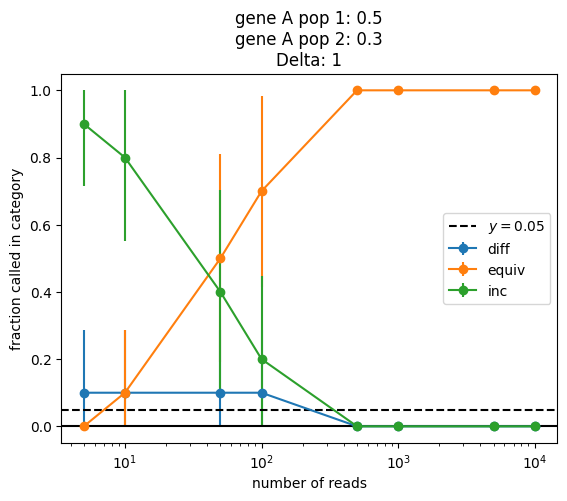

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.0                  0.0                  0.0   
1        10            0.0                  0.0                  0.0   
2        50            0.0                  0.0                  0.0   
3       100            0.0                  0.0                  0.0   
4       500            0.0                  0.0                  0.0   
5      1000            0.0                  0.0                  0.0   
6      5000            0.0                  0.0                  0.0   
7     10000            0.0                  0.0                  0.0   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.3              0.015974              0.584026           0.7   
1             0.4              0.096364              0.703636           0.6   
2             1.0              1.000000              1.000000           0.0   
3             1.0              1.000000              1.000000           0.0   
4             1.0              1.000000              1.000000           0.0   
5             1.0              1.000000              1.000000           0.0   
6             1.0              1.000000              1.000000           0.0   
7             1.0              1.000000              1.000000           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.415974            0.984026  
1            0.296364            0.903636  
2            0.000000            0.000000  
3            0.000000            0.000000  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

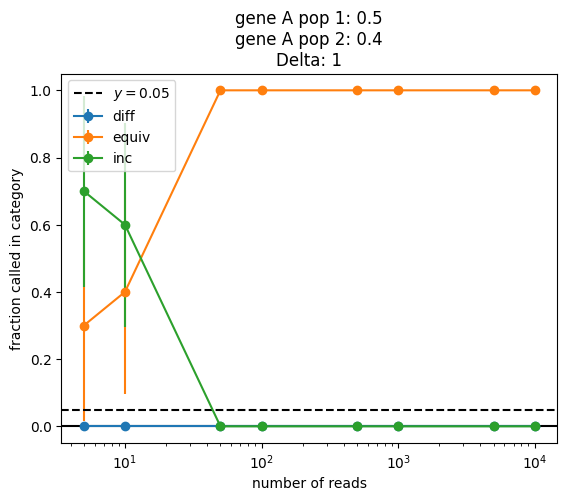

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.0                  0.0                  0.0   
1        10            0.0                  0.0                  0.0   
2        50            0.0                  0.0                  0.0   
3       100            0.0                  0.0                  0.0   
4       500            0.0                  0.0                  0.0   
5      1000            0.0                  0.0                  0.0   
6      5000            0.0                  0.0                  0.0   
7     10000            0.0                  0.0                  0.0   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.4              0.096364              0.703636           0.6   
1             0.3              0.015974              0.584026           0.7   
2             1.0              1.000000              1.000000           0.0   
3             1.0              1.000000              1.000000           0.0   
4             1.0              1.000000              1.000000           0.0   
5             1.0              1.000000              1.000000           0.0   
6             1.0              1.000000              1.000000           0.0   
7             1.0              1.000000              1.000000           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.296364            0.903636  
1            0.415974            0.984026  
2            0.000000            0.000000  
3            0.000000            0.000000  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

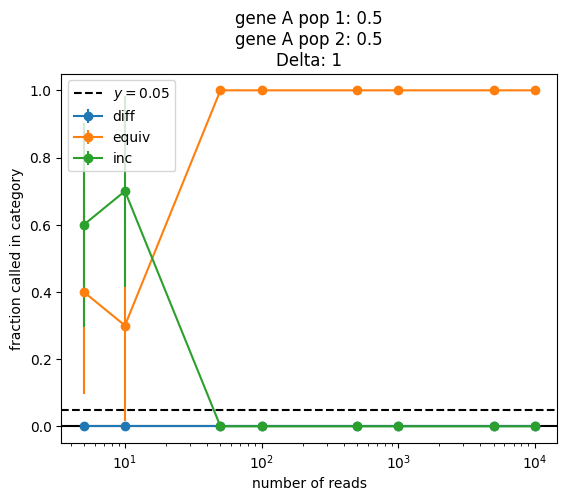

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.0                  0.0                  0.0   
1        10            0.0                  0.0                  0.0   
2        50            0.0                  0.0                  0.0   
3       100            0.0                  0.0                  0.0   
4       500            0.0                  0.0                  0.0   
5      1000            0.0                  0.0                  0.0   
6      5000            0.0                  0.0                  0.0   
7     10000            0.0                  0.0                  0.0   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.4              0.096364              0.703636           0.6   
1             0.5              0.190102              0.809898           0.5   
2             1.0              1.000000              1.000000           0.0   
3             1.0              1.000000              1.000000           0.0   
4             1.0              1.000000              1.000000           0.0   
5             1.0              1.000000              1.000000           0.0   
6             1.0              1.000000              1.000000           0.0   
7             1.0              1.000000              1.000000           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.296364            0.903636  
1            0.190102            0.809898  
2            0.000000            0.000000  
3            0.000000            0.000000  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

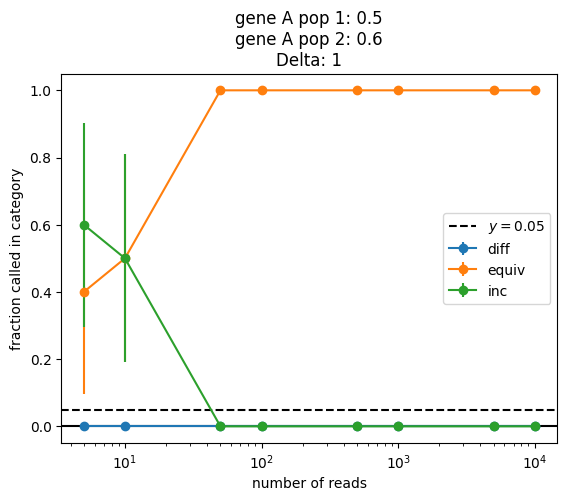

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.0                  0.0                  0.0   
1        10            0.0                  0.0                  0.0   
2        50            0.0                  0.0                  0.0   
3       100            0.0                  0.0                  0.0   
4       500            0.0                  0.0                  0.0   
5      1000            0.0                  0.0                  0.0   
6      5000            0.0                  0.0                  0.0   
7     10000            0.0                  0.0                  0.0   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.4              0.096364              0.703636           0.6   
1             0.5              0.190102              0.809898           0.5   
2             0.9              0.714061              1.000000           0.1   
3             1.0              1.000000              1.000000           0.0   
4             1.0              1.000000              1.000000           0.0   
5             1.0              1.000000              1.000000           0.0   
6             1.0              1.000000              1.000000           0.0   
7             1.0              1.000000              1.000000           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.296364            0.903636  
1            0.190102            0.809898  
2            0.000000            0.285939  
3            0.000000            0.000000  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

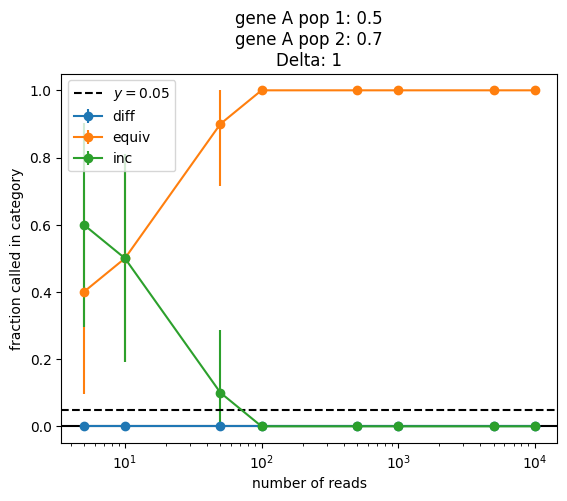

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.0                  0.0                  0.0   
1        10            0.0                  0.0                  0.0   
2        50            0.0                  0.0                  0.0   
3       100            0.0                  0.0                  0.0   
4       500            0.0                  0.0                  0.0   
5      1000            0.0                  0.0                  0.0   
6      5000            0.0                  0.0                  0.0   
7     10000            0.0                  0.0                  0.0   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.2              0.000000              0.447918           0.8   
1             0.3              0.015974              0.584026           0.7   
2             0.7              0.415974              0.984026           0.3   
3             0.8              0.552082              1.000000           0.2   
4             1.0              1.000000              1.000000           0.0   
5             1.0              1.000000              1.000000           0.0   
6             1.0              1.000000              1.000000           0.0   
7             1.0              1.000000              1.000000           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.552082            1.000000  
1            0.415974            0.984026  
2            0.015974            0.584026  
3            0.000000            0.447918  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

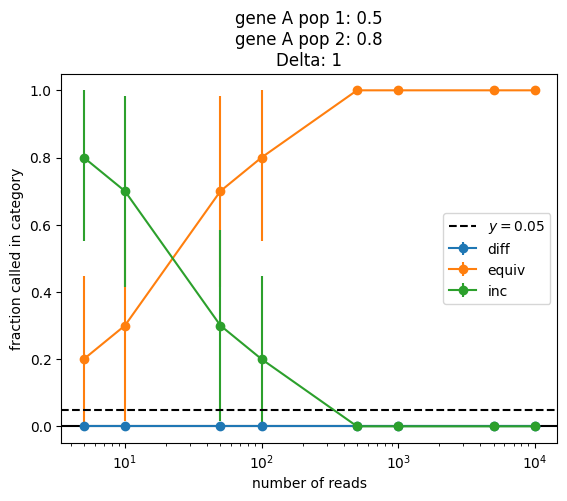

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.1                  0.0             0.285939   
1        10            0.1                  0.0             0.285939   
2        50            0.0                  0.0             0.000000   
3       100            0.1                  0.0             0.285939   
4       500            0.0                  0.0             0.000000   
5      1000            0.0                  0.0             0.000000   
6      5000            0.0                  0.0             0.000000   
7     10000            0.0                  0.0             0.000000   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.2              0.000000              0.447918           0.7   
1             0.2              0.000000              0.447918           0.7   
2             0.4              0.096364              0.703636           0.6   
3             0.3              0.015974              0.584026           0.6   
4             0.9              0.714061              1.000000           0.1   
5             1.0              1.000000              1.000000           0.0   
6             1.0              1.000000              1.000000           0.0   
7             1.0              1.000000              1.000000           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.415974            0.984026  
1            0.415974            0.984026  
2            0.296364            0.903636  
3            0.296364            0.903636  
4            0.000000            0.285939  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.3             0.015974             0.584026   
1        10            0.2             0.000000             0.447918   
2        50            1.0             1.000000             1.000000   
3       100            1.0             1.000000             1.000000   
4       500            1.0             1.000000             1.000000   
5      1000            1.0             1.000000             1.000000   
6      5000            1.0             1.000000             1.000000   
7     10000            1.0             1.000000             1.000000   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.0                   0.0                   0.0           0.7   
1             0.0                   0.0                   0.0           0.8   
2             0.0                   0.0                   0.0           0.0   
3             0.0                   0.0                   0.0           0.0   
4             0.0                   0.0                   0.0           0.0   
5             0.0                   0.0                   0.0           0.0   
6             0.0                   0.0                   0.0           0.0   
7             0.0                   0.0                   0.0           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.415974            0.984026  
1            0.552082            1.000000  
2            0.000000            0.000000  
3            0.000000            0.000000  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

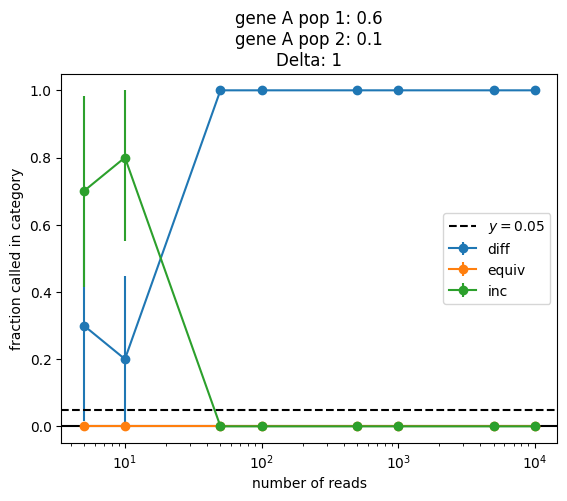

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.3             0.015974             0.584026   
1        10            0.2             0.000000             0.447918   
2        50            1.0             1.000000             1.000000   
3       100            1.0             1.000000             1.000000   
4       500            1.0             1.000000             1.000000   
5      1000            1.0             1.000000             1.000000   
6      5000            1.0             1.000000             1.000000   
7     10000            1.0             1.000000             1.000000   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.0                   0.0                   0.0           0.7   
1             0.0                   0.0                   0.0           0.8   
2             0.0                   0.0                   0.0           0.0   
3             0.0                   0.0                   0.0           0.0   
4             0.0                   0.0                   0.0           0.0   
5             0.0                   0.0                   0.0           0.0   
6             0.0                   0.0                   0.0           0.0   
7             0.0                   0.0                   0.0           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.415974            0.984026  
1            0.552082            1.000000  
2            0.000000            0.000000  
3            0.000000            0.000000  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

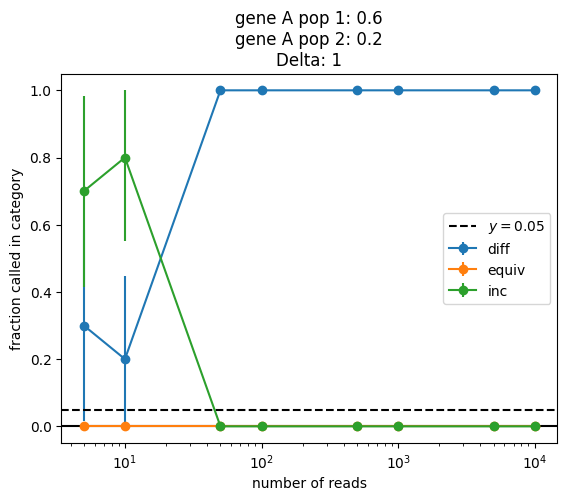

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.1             0.000000             0.285939   
1        10            0.1             0.000000             0.285939   
2        50            0.4             0.096364             0.703636   
3       100            0.6             0.296364             0.903636   
4       500            0.6             0.296364             0.903636   
5      1000            0.5             0.190102             0.809898   
6      5000            0.2             0.000000             0.447918   
7     10000            0.1             0.000000             0.285939   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.0              0.000000              0.000000           0.9   
1             0.1              0.000000              0.285939           0.8   
2             0.0              0.000000              0.000000           0.6   
3             0.1              0.000000              0.285939           0.3   
4             0.1              0.000000              0.285939           0.3   
5             0.1              0.000000              0.285939           0.4   
6             0.4              0.096364              0.703636           0.4   
7             0.7              0.415974              0.984026           0.2   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.714061            1.000000  
1            0.552082            1.000000  
2            0.296364            0.903636  
3            0.015974            0.584026  
4            0.015974            0.584026  
5            0.096364            0.703636  
6            0.096364            0.703636  
7            0.000000            0.447918

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.0                  0.0                  0.0   
1        10            0.0                  0.0                  0.0   
2        50            0.0                  0.0                  0.0   
3       100            0.0                  0.0                  0.0   
4       500            0.0                  0.0                  0.0   
5      1000            0.0                  0.0                  0.0   
6      5000            0.0                  0.0                  0.0   
7     10000            0.0                  0.0                  0.0   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.2              0.000000              0.447918           0.8   
1             0.2              0.000000              0.447918           0.8   
2             0.9              0.714061              1.000000           0.1   
3             1.0              1.000000              1.000000           0.0   
4             1.0              1.000000              1.000000           0.0   
5             1.0              1.000000              1.000000           0.0   
6             1.0              1.000000              1.000000           0.0   
7             1.0              1.000000              1.000000           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.552082            1.000000  
1            0.552082            1.000000  
2            0.000000            0.285939  
3            0.000000            0.000000  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

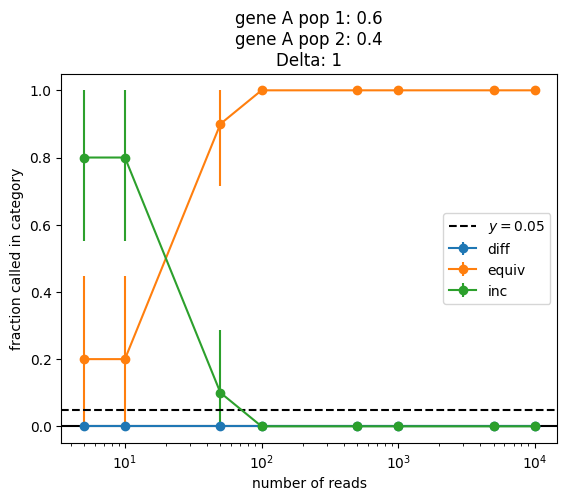

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.0                  0.0                  0.0   
1        10            0.0                  0.0                  0.0   
2        50            0.0                  0.0                  0.0   
3       100            0.0                  0.0                  0.0   
4       500            0.0                  0.0                  0.0   
5      1000            0.0                  0.0                  0.0   
6      5000            0.0                  0.0                  0.0   
7     10000            0.0                  0.0                  0.0   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.4              0.096364              0.703636           0.6   
1             0.5              0.190102              0.809898           0.5   
2             1.0              1.000000              1.000000           0.0   
3             1.0              1.000000              1.000000           0.0   
4             1.0              1.000000              1.000000           0.0   
5             1.0              1.000000              1.000000           0.0   
6             1.0              1.000000              1.000000           0.0   
7             1.0              1.000000              1.000000           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.296364            0.903636  
1            0.190102            0.809898  
2            0.000000            0.000000  
3            0.000000            0.000000  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

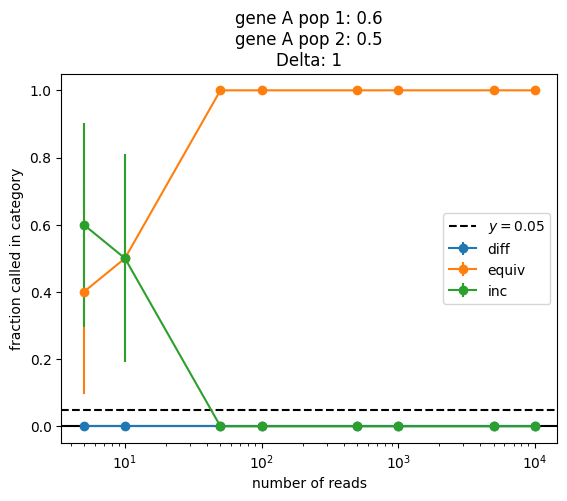

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.0                  0.0                  0.0   
1        10            0.0                  0.0                  0.0   
2        50            0.0                  0.0                  0.0   
3       100            0.0                  0.0                  0.0   
4       500            0.0                  0.0                  0.0   
5      1000            0.0                  0.0                  0.0   
6      5000            0.0                  0.0                  0.0   
7     10000            0.0                  0.0                  0.0   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.5              0.190102              0.809898           0.5   
1             0.7              0.415974              0.984026           0.3   
2             1.0              1.000000              1.000000           0.0   
3             1.0              1.000000              1.000000           0.0   
4             1.0              1.000000              1.000000           0.0   
5             1.0              1.000000              1.000000           0.0   
6             1.0              1.000000              1.000000           0.0   
7             1.0              1.000000              1.000000           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.190102            0.809898  
1            0.015974            0.584026  
2            0.000000            0.000000  
3            0.000000            0.000000  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

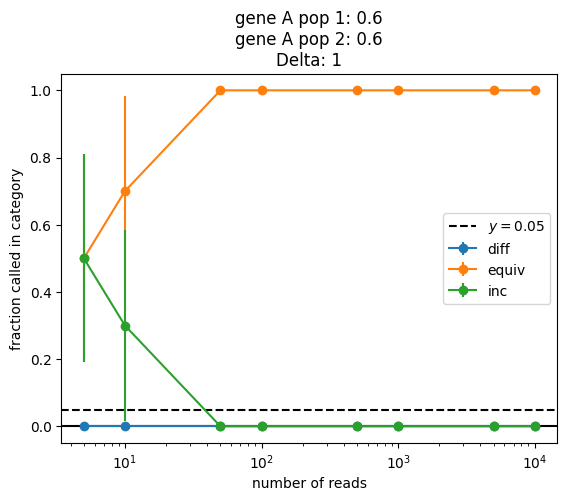

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.0                  0.0                  0.0   
1        10            0.0                  0.0                  0.0   
2        50            0.0                  0.0                  0.0   
3       100            0.0                  0.0                  0.0   
4       500            0.0                  0.0                  0.0   
5      1000            0.0                  0.0                  0.0   
6      5000            0.0                  0.0                  0.0   
7     10000            0.0                  0.0                  0.0   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.6              0.296364              0.903636           0.4   
1             0.6              0.296364              0.903636           0.4   
2             1.0              1.000000              1.000000           0.0   
3             1.0              1.000000              1.000000           0.0   
4             1.0              1.000000              1.000000           0.0   
5             1.0              1.000000              1.000000           0.0   
6             1.0              1.000000              1.000000           0.0   
7             1.0              1.000000              1.000000           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.096364            0.703636  
1            0.096364            0.703636  
2            0.000000            0.000000  
3            0.000000            0.000000  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.1                  0.0             0.285939   
1        10            0.1                  0.0             0.285939   
2        50            0.0                  0.0             0.000000   
3       100            0.0                  0.0             0.000000   
4       500            0.0                  0.0             0.000000   
5      1000            0.0                  0.0             0.000000   
6      5000            0.0                  0.0             0.000000   
7     10000            0.0                  0.0             0.000000   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.5              0.190102              0.809898           0.4   
1             0.5              0.190102              0.809898           0.4   
2             1.0              1.000000              1.000000           0.0   
3             1.0              1.000000              1.000000           0.0   
4             1.0              1.000000              1.000000           0.0   
5             1.0              1.000000              1.000000           0.0   
6             1.0              1.000000              1.000000           0.0   
7             1.0              1.000000              1.000000           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.096364            0.703636  
1            0.096364            0.703636  
2            0.000000            0.000000  
3            0.000000            0.000000  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.1                  0.0             0.285939   
1        10            0.1                  0.0             0.285939   
2        50            0.0                  0.0             0.000000   
3       100            0.0                  0.0             0.000000   
4       500            0.0                  0.0             0.000000   
5      1000            0.0                  0.0             0.000000   
6      5000            0.0                  0.0             0.000000   
7     10000            0.0                  0.0             0.000000   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.6              0.296364              0.903636           0.3   
1             0.4              0.096364              0.703636           0.5   
2             0.9              0.714061              1.000000           0.1   
3             1.0              1.000000              1.000000           0.0   
4             1.0              1.000000              1.000000           0.0   
5             1.0              1.000000              1.000000           0.0   
6             1.0              1.000000              1.000000           0.0   
7             1.0              1.000000              1.000000           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.015974            0.584026  
1            0.190102            0.809898  
2            0.000000            0.285939  
3            0.000000            0.000000  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.3             0.015974             0.584026   
1        10            0.3             0.015974             0.584026   
2        50            1.0             1.000000             1.000000   
3       100            1.0             1.000000             1.000000   
4       500            1.0             1.000000             1.000000   
5      1000            1.0             1.000000             1.000000   
6      5000            1.0             1.000000             1.000000   
7     10000            1.0             1.000000             1.000000   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.0                   0.0                   0.0           0.7   
1             0.0                   0.0                   0.0           0.7   
2             0.0                   0.0                   0.0           0.0   
3             0.0                   0.0                   0.0           0.0   
4             0.0                   0.0                   0.0           0.0   
5             0.0                   0.0                   0.0           0.0   
6             0.0                   0.0                   0.0           0.0   
7             0.0                   0.0                   0.0           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.415974            0.984026  
1            0.415974            0.984026  
2            0.000000            0.000000  
3            0.000000            0.000000  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

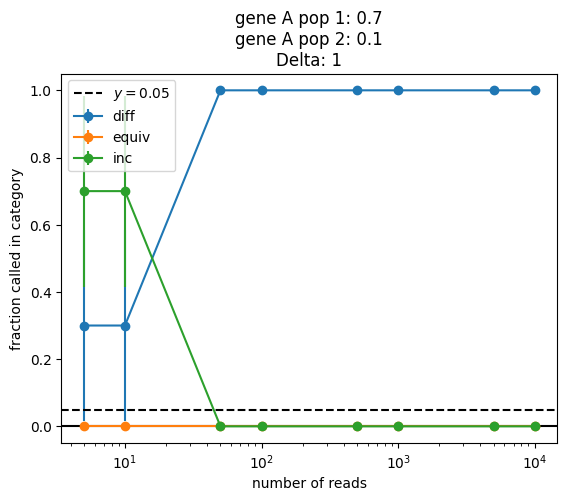

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.3             0.015974             0.584026   
1        10            0.3             0.015974             0.584026   
2        50            1.0             1.000000             1.000000   
3       100            1.0             1.000000             1.000000   
4       500            1.0             1.000000             1.000000   
5      1000            1.0             1.000000             1.000000   
6      5000            1.0             1.000000             1.000000   
7     10000            1.0             1.000000             1.000000   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.0                   0.0                   0.0           0.7   
1             0.0                   0.0                   0.0           0.7   
2             0.0                   0.0                   0.0           0.0   
3             0.0                   0.0                   0.0           0.0   
4             0.0                   0.0                   0.0           0.0   
5             0.0                   0.0                   0.0           0.0   
6             0.0                   0.0                   0.0           0.0   
7             0.0                   0.0                   0.0           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.415974            0.984026  
1            0.415974            0.984026  
2            0.000000            0.000000  
3            0.000000            0.000000  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

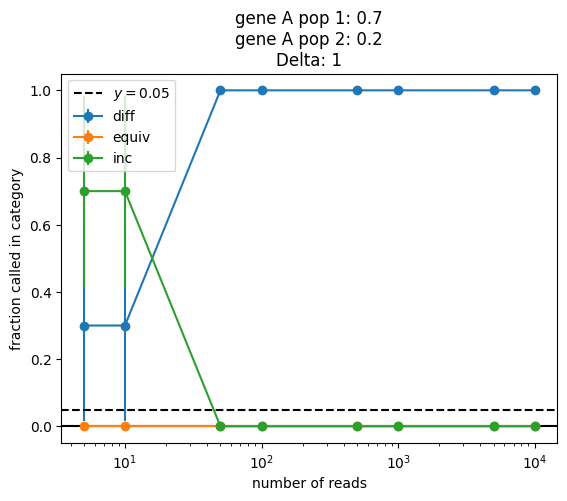

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.1             0.000000             0.285939   
1        10            0.2             0.000000             0.447918   
2        50            0.9             0.714061             1.000000   
3       100            1.0             1.000000             1.000000   
4       500            1.0             1.000000             1.000000   
5      1000            1.0             1.000000             1.000000   
6      5000            1.0             1.000000             1.000000   
7     10000            1.0             1.000000             1.000000   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.0                   0.0                   0.0           0.9   
1             0.0                   0.0                   0.0           0.8   
2             0.0                   0.0                   0.0           0.1   
3             0.0                   0.0                   0.0           0.0   
4             0.0                   0.0                   0.0           0.0   
5             0.0                   0.0                   0.0           0.0   
6             0.0                   0.0                   0.0           0.0   
7             0.0                   0.0                   0.0           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.714061            1.000000  
1            0.552082            1.000000  
2            0.000000            0.285939  
3            0.000000            0.000000  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

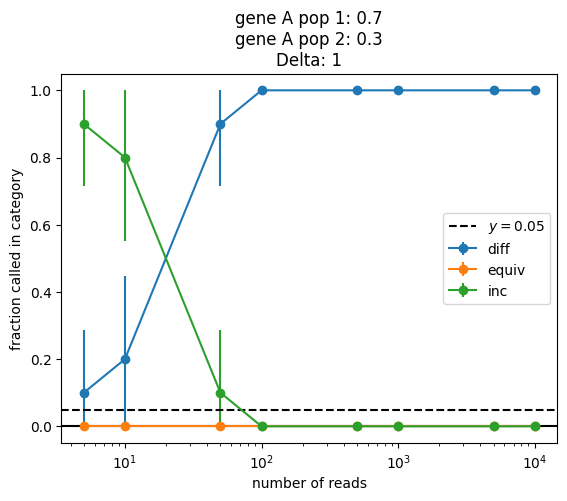

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.1                  0.0             0.285939   
1        10            0.1                  0.0             0.285939   
2        50            0.0                  0.0             0.000000   
3       100            0.0                  0.0             0.000000   
4       500            0.0                  0.0             0.000000   
5      1000            0.0                  0.0             0.000000   
6      5000            0.0                  0.0             0.000000   
7     10000            0.0                  0.0             0.000000   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.1              0.000000              0.285939           0.8   
1             0.0              0.000000              0.000000           0.9   
2             0.4              0.096364              0.703636           0.6   
3             0.6              0.296364              0.903636           0.4   
4             0.9              0.714061              1.000000           0.1   
5             1.0              1.000000              1.000000           0.0   
6             1.0              1.000000              1.000000           0.0   
7             1.0              1.000000              1.000000           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.552082            1.000000  
1            0.714061            1.000000  
2            0.296364            0.903636  
3            0.096364            0.703636  
4            0.000000            0.285939  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.0                  0.0                  0.0   
1        10            0.0                  0.0                  0.0   
2        50            0.0                  0.0                  0.0   
3       100            0.0                  0.0                  0.0   
4       500            0.0                  0.0                  0.0   
5      1000            0.0                  0.0                  0.0   
6      5000            0.0                  0.0                  0.0   
7     10000            0.0                  0.0                  0.0   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.2              0.000000              0.447918           0.8   
1             0.5              0.190102              0.809898           0.5   
2             1.0              1.000000              1.000000           0.0   
3             1.0              1.000000              1.000000           0.0   
4             1.0              1.000000              1.000000           0.0   
5             1.0              1.000000              1.000000           0.0   
6             1.0              1.000000              1.000000           0.0   
7             1.0              1.000000              1.000000           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.552082            1.000000  
1            0.190102            0.809898  
2            0.000000            0.000000  
3            0.000000            0.000000  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.0                  0.0                  0.0   
1        10            0.0                  0.0                  0.0   
2        50            0.0                  0.0                  0.0   
3       100            0.0                  0.0                  0.0   
4       500            0.0                  0.0                  0.0   
5      1000            0.0                  0.0                  0.0   
6      5000            0.0                  0.0                  0.0   
7     10000            0.0                  0.0                  0.0   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.4              0.096364              0.703636           0.6   
1             0.5              0.190102              0.809898           0.5   
2             1.0              1.000000              1.000000           0.0   
3             1.0              1.000000              1.000000           0.0   
4             1.0              1.000000              1.000000           0.0   
5             1.0              1.000000              1.000000           0.0   
6             1.0              1.000000              1.000000           0.0   
7             1.0              1.000000              1.000000           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.296364            0.903636  
1            0.190102            0.809898  
2            0.000000            0.000000  
3            0.000000            0.000000  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

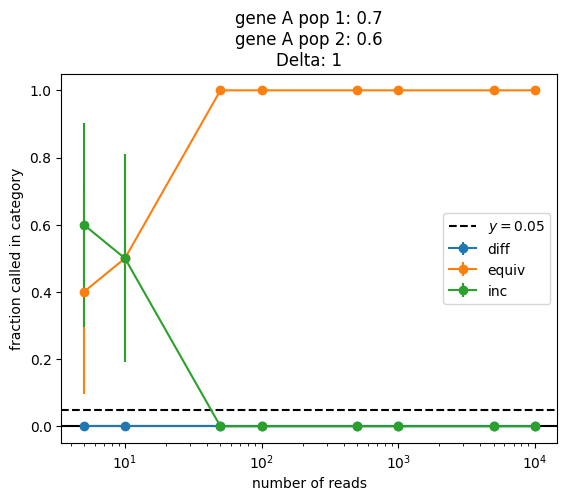

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.0                  0.0                  0.0   
1        10            0.0                  0.0                  0.0   
2        50            0.0                  0.0                  0.0   
3       100            0.0                  0.0                  0.0   
4       500            0.0                  0.0                  0.0   
5      1000            0.0                  0.0                  0.0   
6      5000            0.0                  0.0                  0.0   
7     10000            0.0                  0.0                  0.0   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.7              0.415974              0.984026           0.3   
1             0.8              0.552082              1.000000           0.2   
2             1.0              1.000000              1.000000           0.0   
3             1.0              1.000000              1.000000           0.0   
4             1.0              1.000000              1.000000           0.0   
5             1.0              1.000000              1.000000           0.0   
6             1.0              1.000000              1.000000           0.0   
7             1.0              1.000000              1.000000           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.015974            0.584026  
1            0.000000            0.447918  
2            0.000000            0.000000  
3            0.000000            0.000000  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

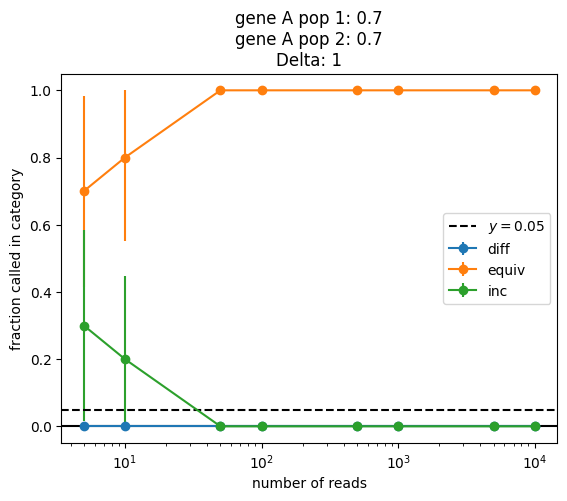

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.0                  0.0                  0.0   
1        10            0.0                  0.0                  0.0   
2        50            0.0                  0.0                  0.0   
3       100            0.0                  0.0                  0.0   
4       500            0.0                  0.0                  0.0   
5      1000            0.0                  0.0                  0.0   
6      5000            0.0                  0.0                  0.0   
7     10000            0.0                  0.0                  0.0   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.7              0.415974              0.984026           0.3   
1             0.6              0.296364              0.903636           0.4   
2             1.0              1.000000              1.000000           0.0   
3             1.0              1.000000              1.000000           0.0   
4             1.0              1.000000              1.000000           0.0   
5             1.0              1.000000              1.000000           0.0   
6             1.0              1.000000              1.000000           0.0   
7             1.0              1.000000              1.000000           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.015974            0.584026  
1            0.096364            0.703636  
2            0.000000            0.000000  
3            0.000000            0.000000  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

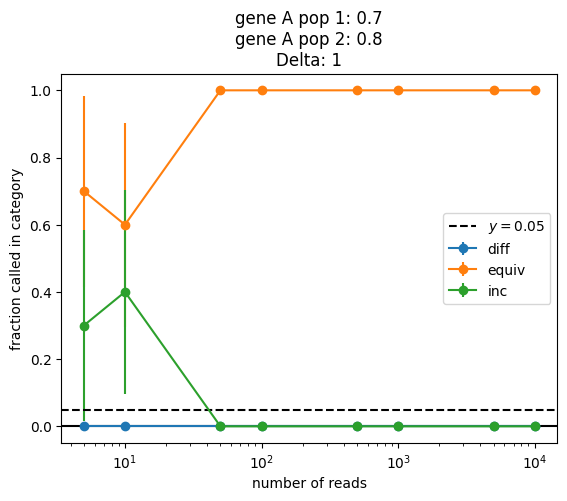

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.0                  0.0                  0.0   
1        10            0.0                  0.0                  0.0   
2        50            0.0                  0.0                  0.0   
3       100            0.0                  0.0                  0.0   
4       500            0.0                  0.0                  0.0   
5      1000            0.0                  0.0                  0.0   
6      5000            0.0                  0.0                  0.0   
7     10000            0.0                  0.0                  0.0   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.8              0.552082              1.000000           0.2   
1             0.5              0.190102              0.809898           0.5   
2             1.0              1.000000              1.000000           0.0   
3             1.0              1.000000              1.000000           0.0   
4             1.0              1.000000              1.000000           0.0   
5             1.0              1.000000              1.000000           0.0   
6             1.0              1.000000              1.000000           0.0   
7             1.0              1.000000              1.000000           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.000000            0.447918  
1            0.190102            0.809898  
2            0.000000            0.000000  
3            0.000000            0.000000  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.3             0.015974             0.584026   
1        10            0.6             0.296364             0.903636   
2        50            1.0             1.000000             1.000000   
3       100            1.0             1.000000             1.000000   
4       500            1.0             1.000000             1.000000   
5      1000            1.0             1.000000             1.000000   
6      5000            1.0             1.000000             1.000000   
7     10000            1.0             1.000000             1.000000   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.0                   0.0                   0.0           0.7   
1             0.0                   0.0                   0.0           0.4   
2             0.0                   0.0                   0.0           0.0   
3             0.0                   0.0                   0.0           0.0   
4             0.0                   0.0                   0.0           0.0   
5             0.0                   0.0                   0.0           0.0   
6             0.0                   0.0                   0.0           0.0   
7             0.0                   0.0                   0.0           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.415974            0.984026  
1            0.096364            0.703636  
2            0.000000            0.000000  
3            0.000000            0.000000  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.4             0.096364             0.703636   
1        10            0.5             0.190102             0.809898   
2        50            1.0             1.000000             1.000000   
3       100            1.0             1.000000             1.000000   
4       500            1.0             1.000000             1.000000   
5      1000            1.0             1.000000             1.000000   
6      5000            1.0             1.000000             1.000000   
7     10000            1.0             1.000000             1.000000   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.0                   0.0                   0.0           0.6   
1             0.0                   0.0                   0.0           0.5   
2             0.0                   0.0                   0.0           0.0   
3             0.0                   0.0                   0.0           0.0   
4             0.0                   0.0                   0.0           0.0   
5             0.0                   0.0                   0.0           0.0   
6             0.0                   0.0                   0.0           0.0   
7             0.0                   0.0                   0.0           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.296364            0.903636  
1            0.190102            0.809898  
2            0.000000            0.000000  
3            0.000000            0.000000  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

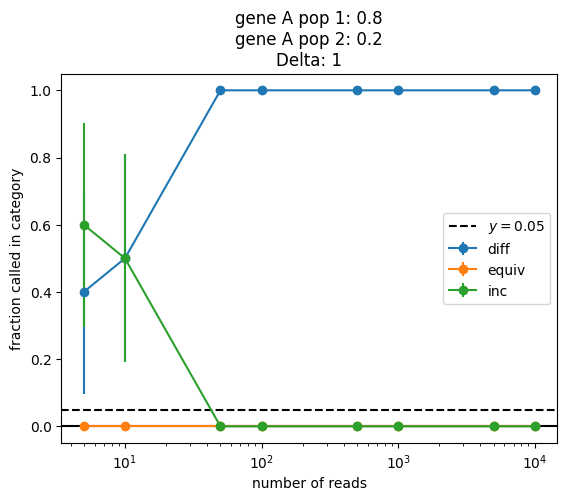

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.4             0.096364             0.703636   
1        10            0.4             0.096364             0.703636   
2        50            1.0             1.000000             1.000000   
3       100            1.0             1.000000             1.000000   
4       500            1.0             1.000000             1.000000   
5      1000            1.0             1.000000             1.000000   
6      5000            1.0             1.000000             1.000000   
7     10000            1.0             1.000000             1.000000   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.0                   0.0                   0.0           0.6   
1             0.0                   0.0                   0.0           0.6   
2             0.0                   0.0                   0.0           0.0   
3             0.0                   0.0                   0.0           0.0   
4             0.0                   0.0                   0.0           0.0   
5             0.0                   0.0                   0.0           0.0   
6             0.0                   0.0                   0.0           0.0   
7             0.0                   0.0                   0.0           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.296364            0.903636  
1            0.296364            0.903636  
2            0.000000            0.000000  
3            0.000000            0.000000  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

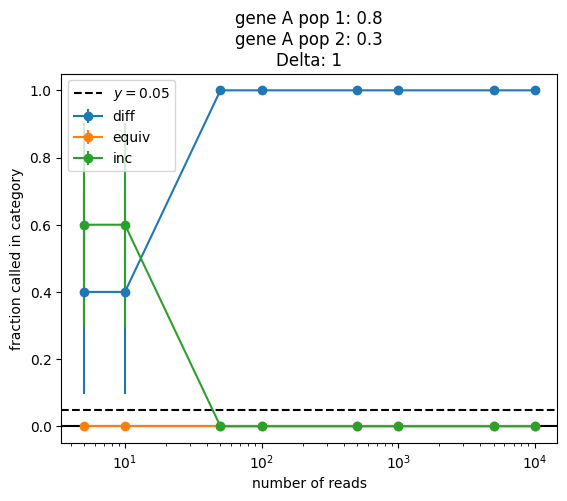

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.1             0.000000             0.285939   
1        10            0.2             0.000000             0.447918   
2        50            0.5             0.190102             0.809898   
3       100            0.6             0.296364             0.903636   
4       500            0.3             0.015974             0.584026   
5      1000            0.2             0.000000             0.447918   
6      5000            0.4             0.096364             0.703636   
7     10000            0.0             0.000000             0.000000   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.1              0.000000              0.285939           0.8   
1             0.0              0.000000              0.000000           0.8   
2             0.0              0.000000              0.000000           0.5   
3             0.1              0.000000              0.285939           0.3   
4             0.3              0.015974              0.584026           0.4   
5             0.0              0.000000              0.000000           0.8   
6             0.1              0.000000              0.285939           0.5   
7             0.7              0.415974              0.984026           0.3   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.552082            1.000000  
1            0.552082            1.000000  
2            0.190102            0.809898  
3            0.015974            0.584026  
4            0.096364            0.703636  
5            0.552082            1.000000  
6            0.190102            0.809898  
7            0.015974            0.584026

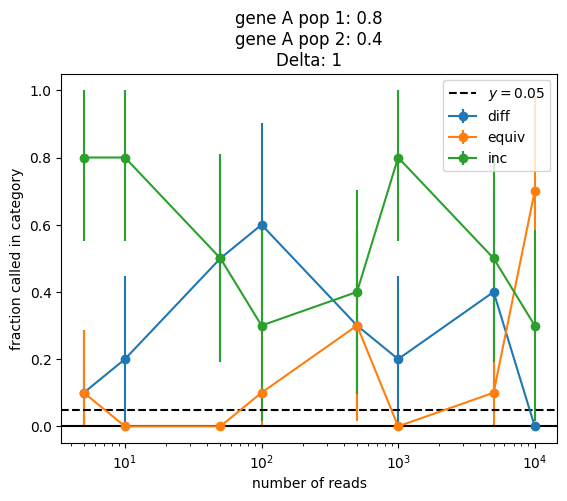

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.0                  0.0                  0.0   
1        10            0.0                  0.0                  0.0   
2        50            0.0                  0.0                  0.0   
3       100            0.0                  0.0                  0.0   
4       500            0.0                  0.0                  0.0   
5      1000            0.0                  0.0                  0.0   
6      5000            0.0                  0.0                  0.0   
7     10000            0.0                  0.0                  0.0   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.1              0.000000              0.285939           0.9   
1             0.2              0.000000              0.447918           0.8   
2             0.9              0.714061              1.000000           0.1   
3             0.8              0.552082              1.000000           0.2   
4             1.0              1.000000              1.000000           0.0   
5             1.0              1.000000              1.000000           0.0   
6             1.0              1.000000              1.000000           0.0   
7             1.0              1.000000              1.000000           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.714061            1.000000  
1            0.552082            1.000000  
2            0.000000            0.285939  
3            0.000000            0.447918  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.0                  0.0                  0.0   
1        10            0.0                  0.0                  0.0   
2        50            0.0                  0.0                  0.0   
3       100            0.0                  0.0                  0.0   
4       500            0.0                  0.0                  0.0   
5      1000            0.0                  0.0                  0.0   
6      5000            0.0                  0.0                  0.0   
7     10000            0.0                  0.0                  0.0   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.4              0.096364              0.703636           0.6   
1             0.5              0.190102              0.809898           0.5   
2             1.0              1.000000              1.000000           0.0   
3             1.0              1.000000              1.000000           0.0   
4             1.0              1.000000              1.000000           0.0   
5             1.0              1.000000              1.000000           0.0   
6             1.0              1.000000              1.000000           0.0   
7             1.0              1.000000              1.000000           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.296364            0.903636  
1            0.190102            0.809898  
2            0.000000            0.000000  
3            0.000000            0.000000  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

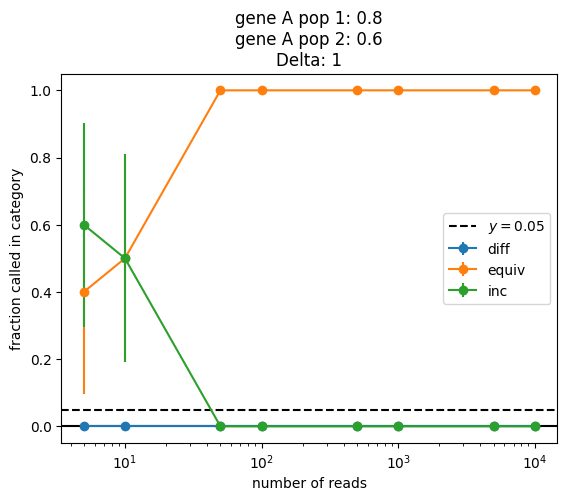

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.0                  0.0                  0.0   
1        10            0.0                  0.0                  0.0   
2        50            0.0                  0.0                  0.0   
3       100            0.0                  0.0                  0.0   
4       500            0.0                  0.0                  0.0   
5      1000            0.0                  0.0                  0.0   
6      5000            0.0                  0.0                  0.0   
7     10000            0.0                  0.0                  0.0   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.9              0.714061              1.000000           0.1   
1             0.6              0.296364              0.903636           0.4   
2             1.0              1.000000              1.000000           0.0   
3             1.0              1.000000              1.000000           0.0   
4             1.0              1.000000              1.000000           0.0   
5             1.0              1.000000              1.000000           0.0   
6             1.0              1.000000              1.000000           0.0   
7             1.0              1.000000              1.000000           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.000000            0.285939  
1            0.096364            0.703636  
2            0.000000            0.000000  
3            0.000000            0.000000  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

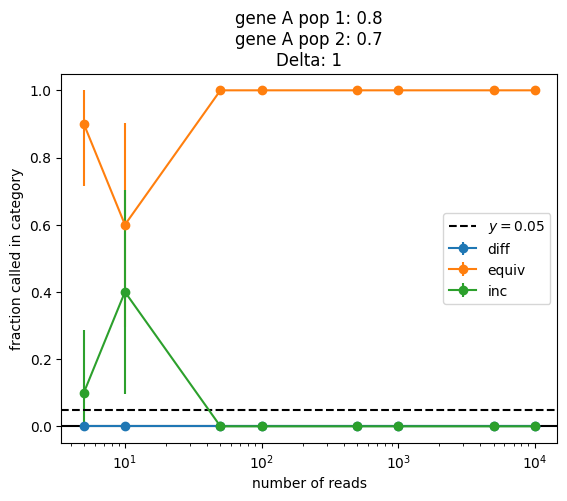

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.0                  0.0                  0.0   
1        10            0.0                  0.0                  0.0   
2        50            0.0                  0.0                  0.0   
3       100            0.0                  0.0                  0.0   
4       500            0.0                  0.0                  0.0   
5      1000            0.0                  0.0                  0.0   
6      5000            0.0                  0.0                  0.0   
7     10000            0.0                  0.0                  0.0   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.9              0.714061                   1.0           0.1   
1             0.9              0.714061                   1.0           0.1   
2             1.0              1.000000                   1.0           0.0   
3             1.0              1.000000                   1.0           0.0   
4             1.0              1.000000                   1.0           0.0   
5             1.0              1.000000                   1.0           0.0   
6             1.0              1.000000                   1.0           0.0   
7             1.0              1.000000                   1.0           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0                 0.0            0.285939  
1                 0.0            0.285939  
2                 0.0            0.000000  
3                 0.0            0.000000  
4                 0.0            0.000000  
5                 0.0            0.000000  
6                 0.0            0.000000  
7                 0.0            0.000000

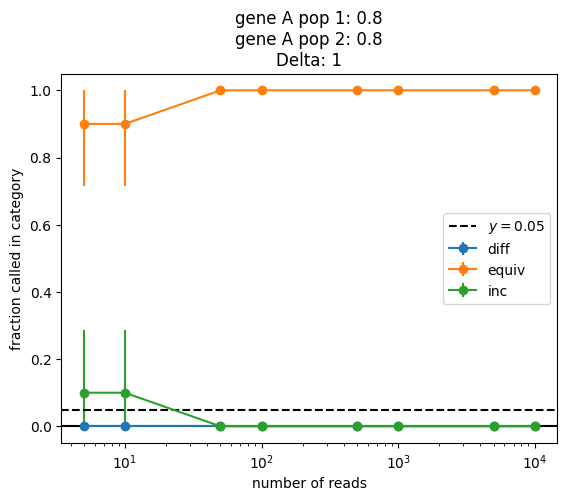

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.0                  0.0                  0.0   
1        10            0.0                  0.0                  0.0   
2        50            0.0                  0.0                  0.0   
3       100            0.0                  0.0                  0.0   
4       500            0.0                  0.0                  0.0   
5      1000            0.0                  0.0                  0.0   
6      5000            0.0                  0.0                  0.0   
7     10000            0.0                  0.0                  0.0   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.9              0.714061                   1.0           0.1   
1             0.9              0.714061                   1.0           0.1   
2             1.0              1.000000                   1.0           0.0   
3             1.0              1.000000                   1.0           0.0   
4             1.0              1.000000                   1.0           0.0   
5             1.0              1.000000                   1.0           0.0   
6             1.0              1.000000                   1.0           0.0   
7             1.0              1.000000                   1.0           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0                 0.0            0.285939  
1                 0.0            0.285939  
2                 0.0            0.000000  
3                 0.0            0.000000  
4                 0.0            0.000000  
5                 0.0            0.000000  
6                 0.0            0.000000  
7                 0.0            0.000000

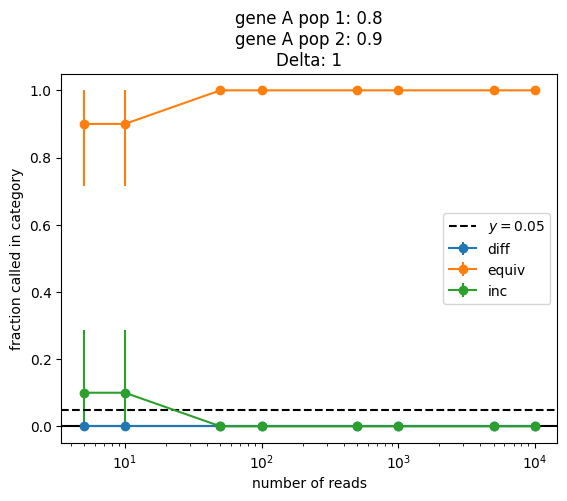

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.5             0.190102             0.809898   
1        10            0.6             0.296364             0.903636   
2        50            1.0             1.000000             1.000000   
3       100            1.0             1.000000             1.000000   
4       500            1.0             1.000000             1.000000   
5      1000            1.0             1.000000             1.000000   
6      5000            1.0             1.000000             1.000000   
7     10000            1.0             1.000000             1.000000   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.0                   0.0                   0.0           0.5   
1             0.0                   0.0                   0.0           0.4   
2             0.0                   0.0                   0.0           0.0   
3             0.0                   0.0                   0.0           0.0   
4             0.0                   0.0                   0.0           0.0   
5             0.0                   0.0                   0.0           0.0   
6             0.0                   0.0                   0.0           0.0   
7             0.0                   0.0                   0.0           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.190102            0.809898  
1            0.096364            0.703636  
2            0.000000            0.000000  
3            0.000000            0.000000  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

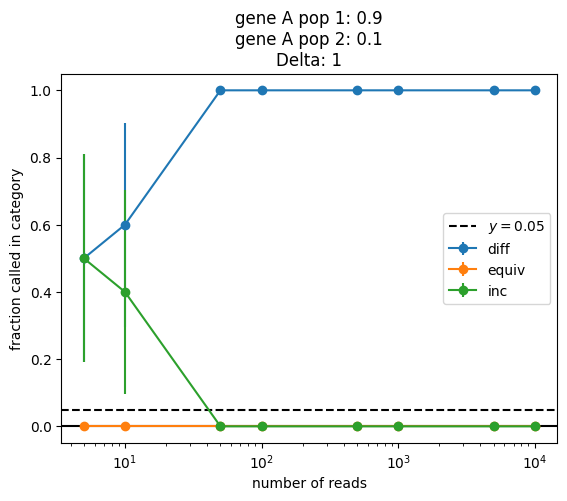

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.5             0.190102             0.809898   
1        10            0.7             0.415974             0.984026   
2        50            1.0             1.000000             1.000000   
3       100            1.0             1.000000             1.000000   
4       500            1.0             1.000000             1.000000   
5      1000            1.0             1.000000             1.000000   
6      5000            1.0             1.000000             1.000000   
7     10000            1.0             1.000000             1.000000   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.0                   0.0                   0.0           0.5   
1             0.0                   0.0                   0.0           0.3   
2             0.0                   0.0                   0.0           0.0   
3             0.0                   0.0                   0.0           0.0   
4             0.0                   0.0                   0.0           0.0   
5             0.0                   0.0                   0.0           0.0   
6             0.0                   0.0                   0.0           0.0   
7             0.0                   0.0                   0.0           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.190102            0.809898  
1            0.015974            0.584026  
2            0.000000            0.000000  
3            0.000000            0.000000  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

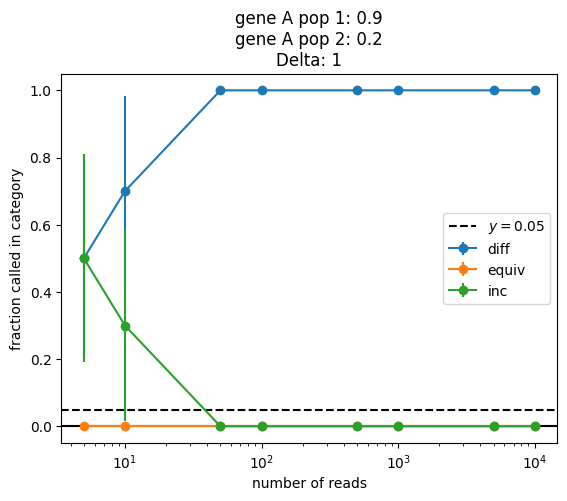

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.7             0.415974             0.984026   
1        10            0.5             0.190102             0.809898   
2        50            1.0             1.000000             1.000000   
3       100            1.0             1.000000             1.000000   
4       500            1.0             1.000000             1.000000   
5      1000            1.0             1.000000             1.000000   
6      5000            1.0             1.000000             1.000000   
7     10000            1.0             1.000000             1.000000   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.0                   0.0                   0.0           0.3   
1             0.0                   0.0                   0.0           0.5   
2             0.0                   0.0                   0.0           0.0   
3             0.0                   0.0                   0.0           0.0   
4             0.0                   0.0                   0.0           0.0   
5             0.0                   0.0                   0.0           0.0   
6             0.0                   0.0                   0.0           0.0   
7             0.0                   0.0                   0.0           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.015974            0.584026  
1            0.190102            0.809898  
2            0.000000            0.000000  
3            0.000000            0.000000  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

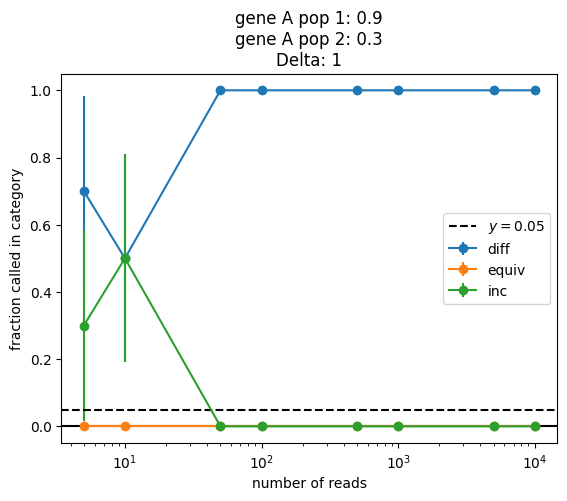

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.2             0.000000             0.447918   
1        10            0.5             0.190102             0.809898   
2        50            0.8             0.552082             1.000000   
3       100            0.9             0.714061             1.000000   
4       500            1.0             1.000000             1.000000   
5      1000            1.0             1.000000             1.000000   
6      5000            1.0             1.000000             1.000000   
7     10000            1.0             1.000000             1.000000   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.1                   0.0              0.285939           0.7   
1             0.0                   0.0              0.000000           0.5   
2             0.0                   0.0              0.000000           0.2   
3             0.0                   0.0              0.000000           0.1   
4             0.0                   0.0              0.000000           0.0   
5             0.0                   0.0              0.000000           0.0   
6             0.0                   0.0              0.000000           0.0   
7             0.0                   0.0              0.000000           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.415974            0.984026  
1            0.190102            0.809898  
2            0.000000            0.447918  
3            0.000000            0.285939  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

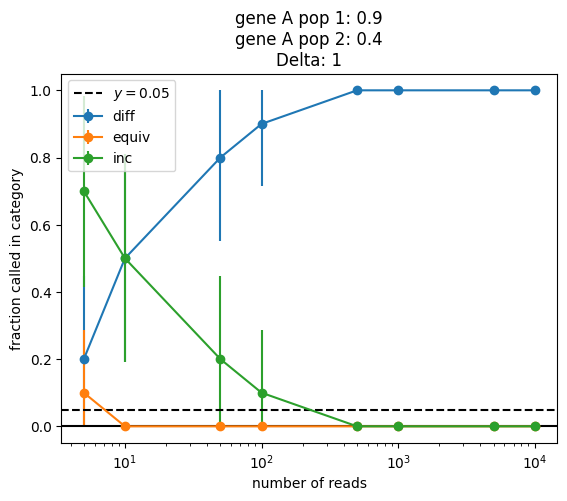

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.0                  0.0             0.000000   
1        10            0.1                  0.0             0.285939   
2        50            0.0                  0.0             0.000000   
3       100            0.1                  0.0             0.285939   
4       500            0.0                  0.0             0.000000   
5      1000            0.0                  0.0             0.000000   
6      5000            0.0                  0.0             0.000000   
7     10000            0.0                  0.0             0.000000   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.1              0.000000              0.285939           0.9   
1             0.1              0.000000              0.285939           0.8   
2             0.7              0.415974              0.984026           0.3   
3             0.3              0.015974              0.584026           0.6   
4             1.0              1.000000              1.000000           0.0   
5             1.0              1.000000              1.000000           0.0   
6             1.0              1.000000              1.000000           0.0   
7             1.0              1.000000              1.000000           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.714061            1.000000  
1            0.552082            1.000000  
2            0.015974            0.584026  
3            0.296364            0.903636  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

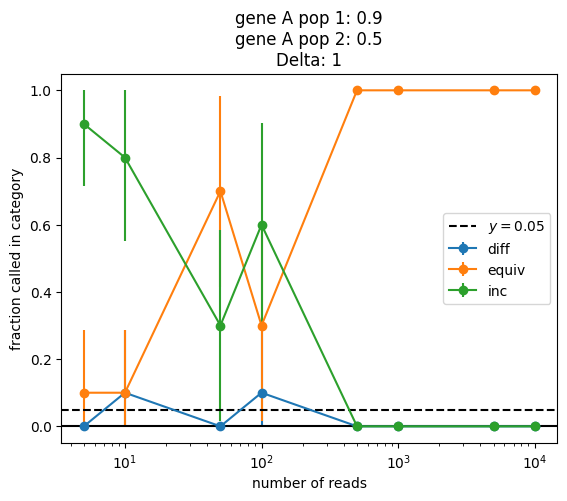

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.0                  0.0                  0.0   
1        10            0.0                  0.0                  0.0   
2        50            0.0                  0.0                  0.0   
3       100            0.0                  0.0                  0.0   
4       500            0.0                  0.0                  0.0   
5      1000            0.0                  0.0                  0.0   
6      5000            0.0                  0.0                  0.0   
7     10000            0.0                  0.0                  0.0   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.3              0.015974              0.584026           0.7   
1             0.5              0.190102              0.809898           0.5   
2             1.0              1.000000              1.000000           0.0   
3             1.0              1.000000              1.000000           0.0   
4             1.0              1.000000              1.000000           0.0   
5             1.0              1.000000              1.000000           0.0   
6             1.0              1.000000              1.000000           0.0   
7             1.0              1.000000              1.000000           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.415974            0.984026  
1            0.190102            0.809898  
2            0.000000            0.000000  
3            0.000000            0.000000  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

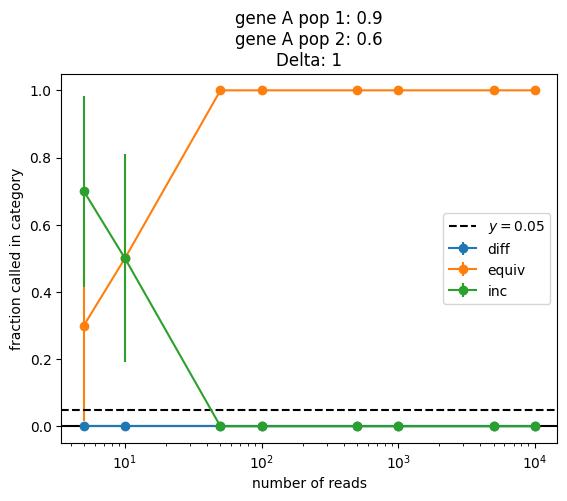

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.0                  0.0                  0.0   
1        10            0.0                  0.0                  0.0   
2        50            0.0                  0.0                  0.0   
3       100            0.0                  0.0                  0.0   
4       500            0.0                  0.0                  0.0   
5      1000            0.0                  0.0                  0.0   
6      5000            0.0                  0.0                  0.0   
7     10000            0.0                  0.0                  0.0   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.7              0.415974              0.984026           0.3   
1             0.6              0.296364              0.903636           0.4   
2             1.0              1.000000              1.000000           0.0   
3             1.0              1.000000              1.000000           0.0   
4             1.0              1.000000              1.000000           0.0   
5             1.0              1.000000              1.000000           0.0   
6             1.0              1.000000              1.000000           0.0   
7             1.0              1.000000              1.000000           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0            0.015974            0.584026  
1            0.096364            0.703636  
2            0.000000            0.000000  
3            0.000000            0.000000  
4            0.000000            0.000000  
5            0.000000            0.000000  
6            0.000000            0.000000  
7            0.000000            0.000000

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.0                  0.0                  0.0   
1        10            0.0                  0.0                  0.0   
2        50            0.0                  0.0                  0.0   
3       100            0.0                  0.0                  0.0   
4       500            0.0                  0.0                  0.0   
5      1000            0.0                  0.0                  0.0   
6      5000            0.0                  0.0                  0.0   
7     10000            0.0                  0.0                  0.0   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             0.9              0.714061                   1.0           0.1   
1             1.0              1.000000                   1.0           0.0   
2             1.0              1.000000                   1.0           0.0   
3             1.0              1.000000                   1.0           0.0   
4             1.0              1.000000                   1.0           0.0   
5             1.0              1.000000                   1.0           0.0   
6             1.0              1.000000                   1.0           0.0   
7             1.0              1.000000                   1.0           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0                 0.0            0.285939  
1                 0.0            0.000000  
2                 0.0            0.000000  
3                 0.0            0.000000  
4                 0.0            0.000000  
5                 0.0            0.000000  
6                 0.0            0.000000  
7                 0.0            0.000000

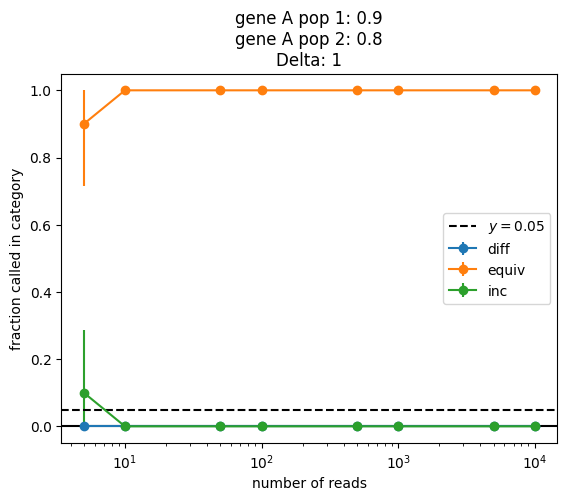

num reads: 5
num reads: 10
num reads: 50
num reads: 100
num reads: 500
num reads: 1000
num reads: 5000
num reads: 10000


numReads  frac_sig_diff  frac_sig_diff_lower  frac_sig_diff_upper  \
0         5            0.0                  0.0                  0.0   
1        10            0.0                  0.0                  0.0   
2        50            0.0                  0.0                  0.0   
3       100            0.0                  0.0                  0.0   
4       500            0.0                  0.0                  0.0   
5      1000            0.0                  0.0                  0.0   
6      5000            0.0                  0.0                  0.0   
7     10000            0.0                  0.0                  0.0   

   frac_sig_equiv  frac_sig_equiv_lower  frac_sig_equiv_upper  frac_sig_inc  \
0             1.0                   1.0                   1.0           0.0   
1             1.0                   1.0                   1.0           0.0   
2             1.0                   1.0                   1.0           0.0   
3             1.0                   1.0                   1.0           0.0   
4             1.0                   1.0                   1.0           0.0   
5             1.0                   1.0                   1.0           0.0   
6             1.0                   1.0                   1.0           0.0   
7             1.0                   1.0                   1.0           0.0   

   frac_sig_inc_lower  frac_sig_inc_upper  
0                 0.0                 0.0  
1                 0.0                 0.0  
2                 0.0                 0.0  
3                 0.0                 0.0  
4                 0.0                 0.0  
5                 0.0                 0.0  
6                 0.0                 0.0  
7                 0.0                 0.0

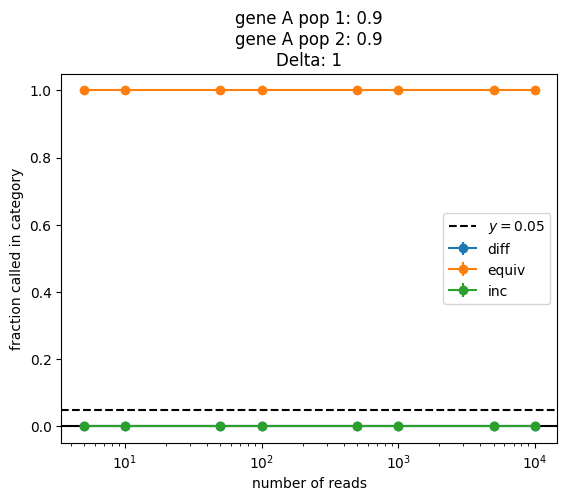

In [7]:
grid = {"fracA1" : [], "fracA2" : [], "winning_col" : [], "winning_numReads" : []}


for i in geneA_fracs_list:
    for j in geneA_fracs_list:
        geneA_fracs = [i,j]
        out, winning_col, winning_numReads = simulate(numReads, num_trials, geneA_fracs, num_samples, norm, log_scale, seed = 123)
        plot_sim(out, geneA_fracs, delta, outpath)
        grid["fracA1"].append(i)
        grid["fracA2"].append(j)
        grid["winning_col"].append(winning_col)
        grid["winning_numReads"].append(winning_numReads)
        
grid = pd.DataFrame(grid)

In [8]:
grid

fracA1  fracA2     winning_col  winning_numReads
0      0.1     0.1  frac_sig_equiv               100
1      0.1     0.2  frac_sig_equiv              5000
2      0.1     0.3   frac_sig_diff                50
3      0.1     0.4   frac_sig_diff                50
4      0.1     0.5   frac_sig_diff                50
..     ...     ...             ...               ...
76     0.9     0.5  frac_sig_equiv               100
77     0.9     0.6  frac_sig_equiv                10
78     0.9     0.7  frac_sig_equiv                 5
79     0.9     0.8  frac_sig_equiv                 5
80     0.9     0.9  frac_sig_equiv                 5

[81 rows x 4 columns]

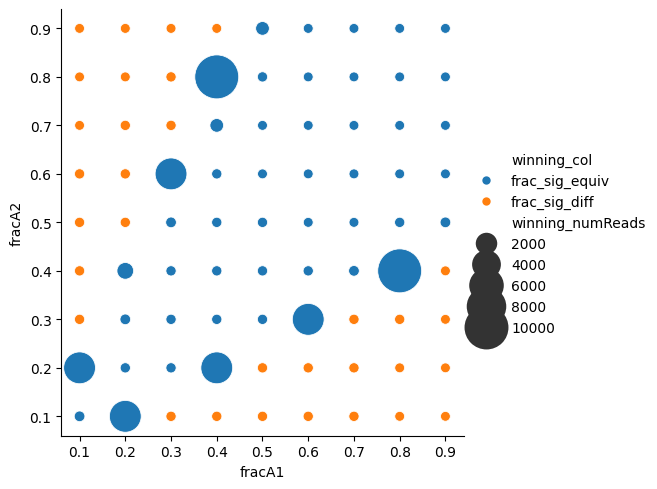

In [9]:
sns.relplot(grid, x = "fracA1", y = "fracA2", size = "winning_numReads", hue = "winning_col",sizes=(50, 1000))
plt.show()